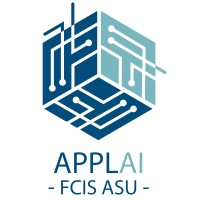

# ***Retail prices optimization***

**Our main objective is to analyse the data of a retail store in order to know how to gain the maximum profit based on the insights we will get .**

**The data link:** [Retail Price Optimization Data](https://www.kaggle.com/datasets/suddharshan/retail-price-optimization)

![link text](https://th.bing.com/th/id/OIP.ZaZhTrU7lru7cHpX_RCoYgHaDT?pid=ImgDet&rs=1)

# **1-Importing libraries & Reading the data**

## **1.1) Importing the needed libraries**

In [ ]:
import pandas as pd
import numpy as np 
from numpy.random import randn
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
import warnings
# Ignore warnings
warnings.filterwarnings('ignore')

## **2.2) Reading the data**

In [ ]:
df=pd.read_csv('retail_price.csv')

# **2-Data Exploring**

In [ ]:
#Checking the first 10 records of the data
df.head(10)

product_id product_category_name month_year  qty  total_price  \
0       bed1        bed_bath_table   1/5/2017    1        45.95   
1       bed1        bed_bath_table   1/6/2017    3       137.85   
2       bed1        bed_bath_table   1/7/2017    6       275.70   
3       bed1        bed_bath_table   1/8/2017    4       183.80   
4       bed1        bed_bath_table   1/9/2017    2        91.90   
5       bed1        bed_bath_table  1/10/2017    3       137.85   
6       bed1        bed_bath_table  1/11/2017   11       445.85   
7       bed1        bed_bath_table  1/12/2017    6       239.94   
8       bed1        bed_bath_table   1/1/2018   19       759.81   
9       bed1        bed_bath_table   1/2/2018   18       719.82   

   freight_price  unit_price  product_name_lenght  product_description_lenght  \
0      15.100000   45.950000                   39                         161   
1      12.933333   45.950000                   39                         161   
2      14.840000   45.950000                   39                         161   
3      14.287500   45.950000                   39                         161   
4      15.100000   45.950000                   39                         161   
5      15.100000   45.950000                   39                         161   
6      15.832727   40.531818                   39                         161   
7      15.230000   39.990000                   39                         161   
8      16.533684   39.990000                   39                         161   
9      13.749444   39.990000                   39                         161   

   product_photos_qty  ...     comp_1  ps1        fp1      comp_2  ps2  \
0                   2  ...  89.900000  3.9  15.011897  215.000000  4.4   
1                   2  ...  89.900000  3.9  14.769216  209.000000  4.4   
2                   2  ...  89.900000  3.9  13.993833  205.000000  4.4   
3                   2  ...  89.900000  3.9  14.656757  199.509804  4.4   
4                   2  ...  89.900000  3.9  18.776522  163.398710  4.4   
5                   2  ...  89.900000  3.9  21.572143   45.950000  4.0   
6                   2  ...  89.900000  3.9  16.294000   40.531818  4.0   
7                   2  ...  88.488235  3.9  18.898333   39.990000  4.0   
8                   2  ...  86.900000  3.9  19.383529   39.990000  4.0   
9                   2  ...  86.900000  3.9  19.209091   39.990000  4.0   

         fp2     comp_3  ps3        fp3  lag_price  
0   8.760000  45.950000  4.0  15.100000  45.900000  
1  21.322000  45.950000  4.0  12.933333  45.950000  
2  22.195932  45.950000  4.0  14.840000  45.950000  
3  19.412885  45.950000  4.0  14.287500  45.950000  
4  24.324687  45.950000  4.0  15.100000  45.950000  
5  15.100000  45.950000  4.0  15.100000  45.950000  
6  15.832727  40.531818  4.0  15.832727  45.950000  
7  15.230000  39.990000  4.0  15.230000  40.531818  
8  16.533684  39.990000  4.0  16.533684  39.990000  
9  13.749444  39.990000  4.0  13.749444  39.990000  

[10 rows x 30 columns]

In [ ]:
#Checking the data types of the features & knowing the rest of the features
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 676 entries, 0 to 675
Data columns (total 30 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  676 non-null    object 
 1   product_category_name       676 non-null    object 
 2   month_year                  676 non-null    object 
 3   qty                         676 non-null    int64  
 4   total_price                 676 non-null    float64
 5   freight_price               676 non-null    float64
 6   unit_price                  676 non-null    float64
 7   product_name_lenght         676 non-null    int64  
 8   product_description_lenght  676 non-null    int64  
 9   product_photos_qty          676 non-null    int64  
 10  product_weight_g            676 non-null    int64  
 11  product_score               676 non-null    float64
 12  customers                   676 non-null    int64  
 13  weekday                     676 non

##**So first we need to understand our data, What does our features show ?**


1.   **product_id** : The id of the product.
2.   **product_category_name** : The category that the product belongs to.
3.   **month_year** : The date in which the order is made.
4.   **qty** : quantity sold from the product.
5.   **total_price** : total price of the order unit_price*qty.
6.   **freight_price** : The average price for shipping the order.
7.   **unit_price** : The price of one unit.
8.   **product_name_lenght** : The length of the product name.
9.   **product_description_lenght** : The length of th product description.
10.  **product_photos_qty** : Number of photos available for the product.
11.  **product_weight_g** : Product weight in grams.
12.  **product_score** : Average product score.
13.  **customers** : Number of customers that ordered this product.
14.  **weekday** : Number of weekdays in that month.
15.  **weekend** :Number of weekend days in that month.
16.  **holiday** : Number of days considered as holiday in that month.
17.  **month** : The month of the order.
18.  **year** :Year of the order.
19.  **s** : It represents the Seasonality which is in short represent how much the demand is for the given product in a season.
20.  **volume**: The volume of the product.
21.  **comp_1**: The price of the product for the first competitor.
22.  **ps1** : The product score for the first competitor.
23.  **fp1** : The product freight price for the first competitor. 
24.  **comp_2** : The price of the product for the second competitor.
25.  **ps2** : The product score for the second competitor.
26.  **fp2** : The product freight price for the second competitor.
27.  **comp_3** : The price of the product for the third competitor.
28.  **ps3** : The product score for the third competitor.
29.  **fp3** : The product freight price for the third competitor.
30.  **lag_price** : The price of the product in the previous month.


In [ ]:
#Checking the shape of the data
df.shape

(676, 30)

We have 676 different records (orders) and 30 different features that we talked about above.

**Let's rename some of the columns to be more detailed**

In [ ]:
df.rename(columns={'qty': 'Quantity'},inplace=True)
df.rename(columns={'product_weight_g': 'product_weight_in_grams'},inplace=True)
df.rename(columns={'weekday': 'WeekdaysInThisMonth'},inplace=True)
df.rename(columns={'weekend': 'WeekendsInThisMonth'},inplace=True)
df.rename(columns={'holiday': 'HolidaysInThisMonth'},inplace=True)
df.rename(columns={'s': 'seasonality'},inplace=True)
df.rename(columns={'comp_1': 'Competetor1_Price'},inplace=True)
df.rename(columns={'comp_2': 'Competetor2_Price'},inplace=True)
df.rename(columns={'comp_3': 'Competetor3_Price'},inplace=True)
df.rename(columns={'ps1': 'Competetor1_ProductScore'},inplace=True)
df.rename(columns={'ps2': 'Competetor2_ProductScore'},inplace=True)
df.rename(columns={'ps3': 'Competetor3_ProductScore'},inplace=True)
df.rename(columns={'fp1': 'Competetor1_FreightPrice'},inplace=True)
df.rename(columns={'fp2': 'Competetor2_FreightPrice'},inplace=True)
df.rename(columns={'fp3': 'Competetor3_FreightPrice'},inplace=True)
df.rename(columns={'lag_price': 'LastMonthPrice'},inplace=True)

**Checking the names of the columns again**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 676 entries, 0 to 675
Data columns (total 30 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  676 non-null    object 
 1   product_category_name       676 non-null    object 
 2   month_year                  676 non-null    object 
 3   Quantity                    676 non-null    int64  
 4   total_price                 676 non-null    float64
 5   freight_price               676 non-null    float64
 6   unit_price                  676 non-null    float64
 7   product_name_lenght         676 non-null    int64  
 8   product_description_lenght  676 non-null    int64  
 9   product_photos_qty          676 non-null    int64  
 10  product_weight_in_grams     676 non-null    int64  
 11  product_score               676 non-null    float64
 12  customers                   676 non-null    int64  
 13  WeekdaysInThisMonth         676 non

# **3-Visulization & Analysis**

## 3.1)**The most 10 top most repeated(ordered) products**

In [ ]:
# Get the top 10 most repeated product ids
top_10_categories = df['product_id'].value_counts().nlargest(10).index.tolist()

# Filter the DataFrame to include only rows with the top 10 categories
df_top_10 = df[df['product_id'].isin(top_10_categories)]

Text(0, 0.5, 'Count')

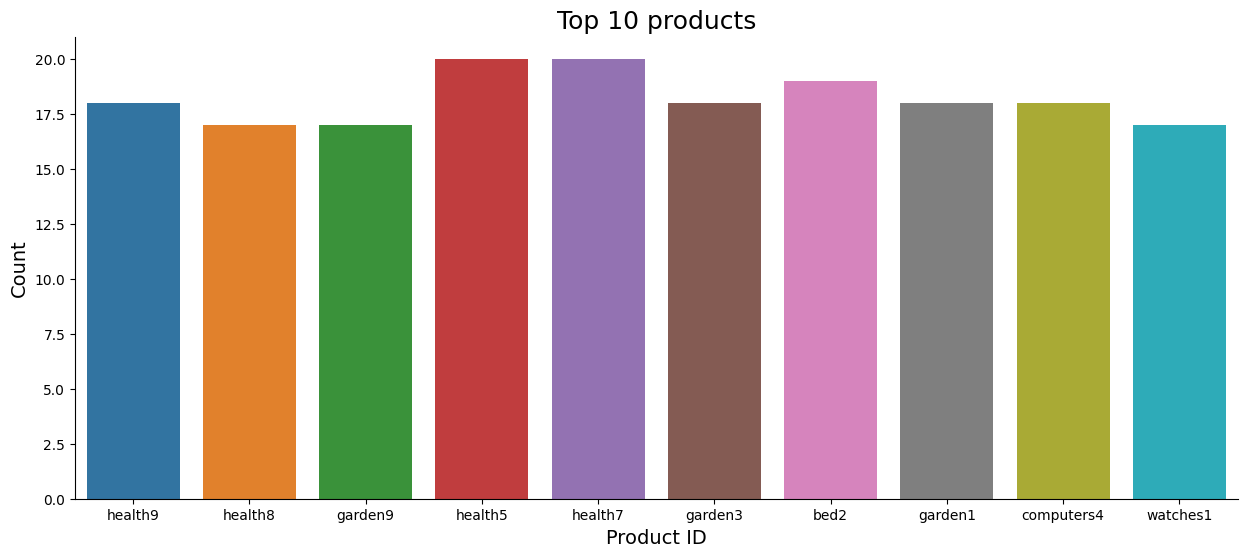

In [ ]:
#Displaying the plot
plt.figure(figsize=(15, 6))
g = sns.countplot(x="product_id", data=df_top_10)
sns.despine()
plt.title("Top 10 products", fontsize = 18)
plt.xlabel("Product ID", fontsize = 14)
plt.ylabel("Count", fontsize = 14)

**What can we see from this visualization ?**

-health5 & health7 are the most sold items.

-health9 comes after them.

-That means the top 3 products being sold in our retail store are from the health category.

##3.2)**The most in demand categories**

**First in general**

Text(0, 0.5, 'Count Demands')

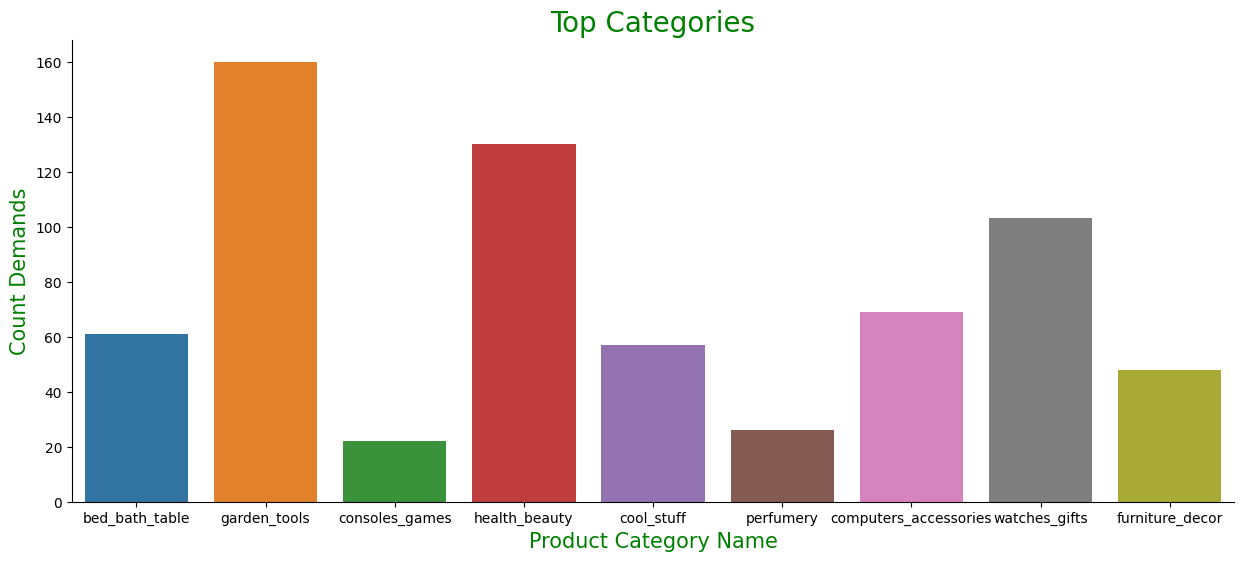

In [ ]:
plt.figure(figsize=(15, 6))
g = sns.countplot(x="product_category_name", data=df)
sns.despine()
plt.title("Top Categories", fontsize = 20,color='green')
plt.xlabel("Product Category Name", fontsize = 15,color='green')
plt.ylabel("Count Demands", fontsize = 15,color='green')

**What can we see from this visualization ?**

-The most in demand category is garden_tools although the most 3 sold products are from the health category.

-We can guess that our retail store might be in a countryside or we supply to many agriculture companies .

-The second most category in demand is health & beauty that makes sense as our top 3 most sold items are from the health category.

**Secondly by year**

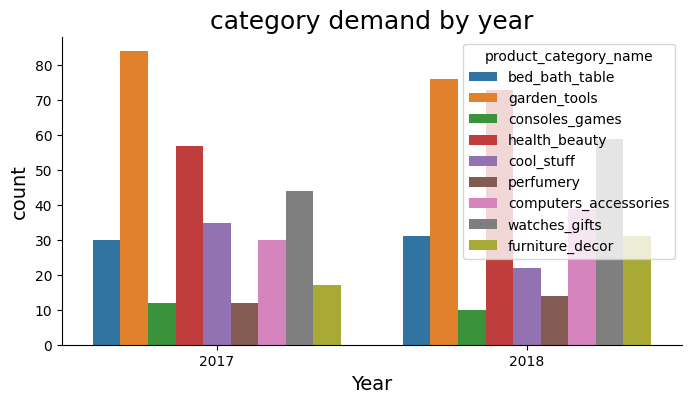

In [ ]:
plt.figure(figsize=(8,4))
sns.countplot(x='year',hue='product_category_name',data=df)
sns.despine()
plt.title("category demand by year", fontsize = 18)
plt.xlabel("Year", fontsize = 14)
plt.ylabel("count", fontsize = 14)
plt.show()

**What can we see from this visualization ?**

-In both 2017 and 2018 the most in demand category was garden tools maybe it is our main category or what we are popular for as we said before.

-The people needs didn't change that much between the 2 years but what we can see here is the people need for health and beauty products increasing soo much in 2018 than 2017.

**finally by month**

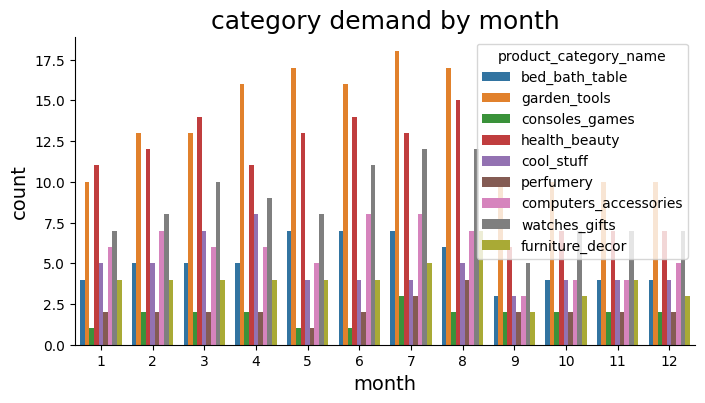

In [ ]:
plt.figure(figsize=(8,4))
sns.countplot(x='month',hue='product_category_name',data=df)
sns.despine()
plt.title("category demand by month", fontsize = 18)
plt.xlabel("month", fontsize = 14)
plt.ylabel("count", fontsize = 14)
plt.show()

**What can we see from this visualization ?**

-As we can see most of the months have the garden tools as the most in demand category but we have some months in which health & beauty category overtook the lead.

##3.3)**Top 10 most sold products by quantity**

In [ ]:
# Group the data by category and get the maximum quantity sold for each category
max_quantity_by_category = df.groupby('product_id')['Quantity'].max()

# Sort the maximum quantities in descending order and get the top 10 categories
top_10_categories = max_quantity_by_category.sort_values(ascending=False).nlargest(10)

# Print the result
print(top_10_categories)

product_id
furniture2    122
watches6      114
garden6        91
garden10       87
garden9        82
cool3          76
computers2     71
garden4        69
computers6     69
bed2           60
Name: Quantity, dtype: int64


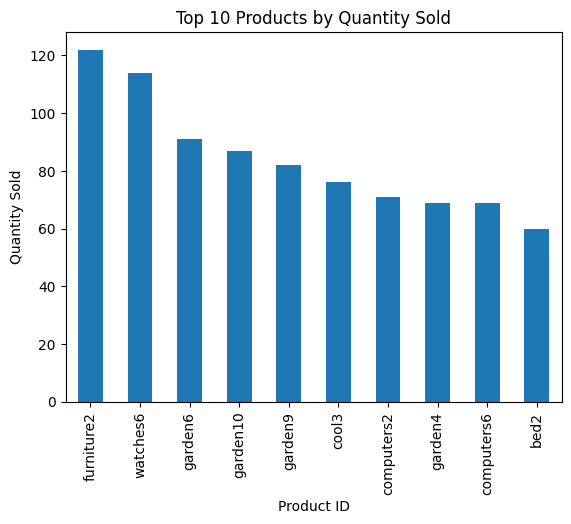

In [ ]:
# Create a bar plot of the product IDs and quantity sold
top_10_categories.plot.bar(x='product_id', y='quantity')

# Add labels to the plot
plt.title('Top 10 Products by Quantity Sold')
plt.xlabel('Product ID')
plt.ylabel('Quantity Sold')

# Show the plot
plt.show()

**What can we see from this visualization ?**

-The most sold quantity of a product is furniture2 which is 122 products.

-watches6 is the second most sold based on the quantity.

-The third,fourth and fifth most sold quantites are for garden tools which proves that most likley the retail store supplies farms or agliculture compnaies .

##3.4)**The 10 most expensive products we have in our store**

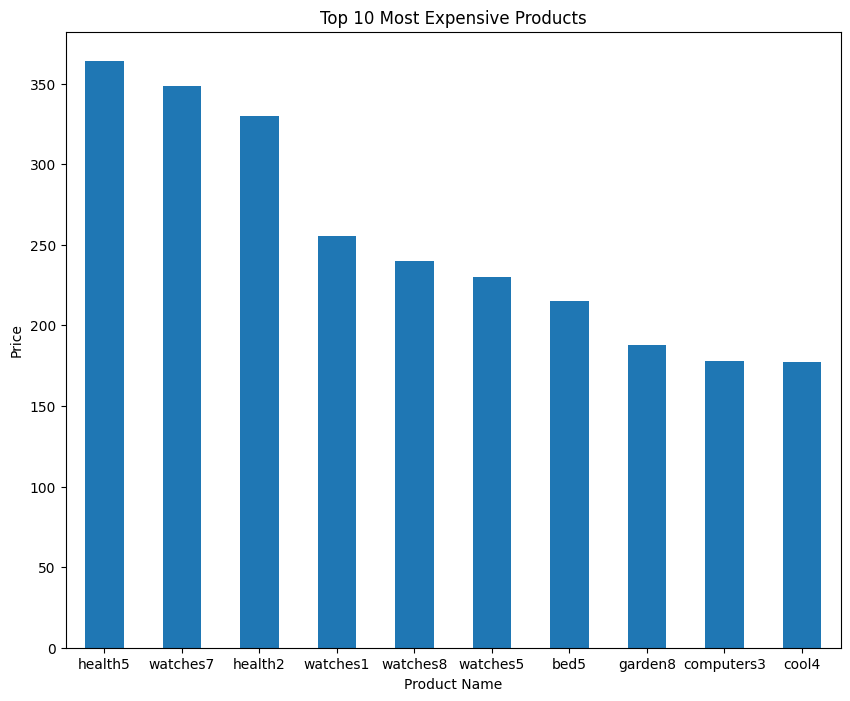

In [ ]:
# Group the DataFrame by product_name and compute the mean price for each group
product_prices = df.groupby('product_id')['unit_price'].max()

# Sort the resulting DataFrame by price in descending order and select the top 10 rows
top_10_expensive = product_prices.sort_values(ascending=False).head(10)


# Create a bar chart of the top 10 most expensive unique products
fig, ax = plt.subplots(figsize=(10, 8))
ax = top_10_expensive.plot.bar(rot=0)

# Add labels to the plot
plt.title('Top 10 Most Expensive Products')
plt.xlabel('Product Name')
plt.ylabel('Price')

# Show the plot
plt.show()


**What can we see here ?**

-health5 is the most expensive product that we have although in our data it have been ordered the most.

-Watches are considered the most repeated category when it comes to the most expensive stuff we sell fancy watches for sure :)

##3.5)**Prices & Scores comparing to our competitors**

### **1)Our prices distribution & Ratings to our first competitor**

First let's check the price distribution

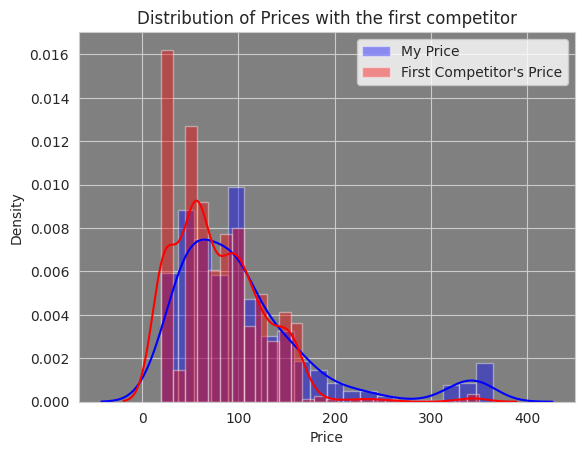

In [ ]:
# Create a distribution plot with prices in different colors
sns.distplot(df['unit_price'], label='My Price')
sns.distplot(df['Competetor1_Price'], label="First Competitor's Price")

# Set the plot style to a white grid
sns.set_style('whitegrid')

# Set the color palette to red and blue
colors = ['#0000ff','#FF0000']
sns.set_palette(sns.color_palette(colors))

# Add labels to the plot
plt.title('Distribution of Prices with the first competitor')
plt.xlabel('Price')
plt.ylabel('Density')

# Set the background color to grey
plt.gca().set_facecolor('grey')

# Add a legend
plt.legend()

# Show the plot
plt.show()

As we can see here our prices are distribution is great but we do have some expensive products more than our competitor which means he/she sells them with a better price so what can we do with this products ? 

**Here is what we can do to get more sales for the expensive products:**

*As we saw in the previous visualizations some of the expensive stuff are the stuff sold the most like the health5 product so we need to put this expensive stuff on sale or maybe include them in an offer with the cheap stuff that we sell for a much better price so that we can still gain the maximum profit all the way !*

**Let's check the Product Scores distribution**

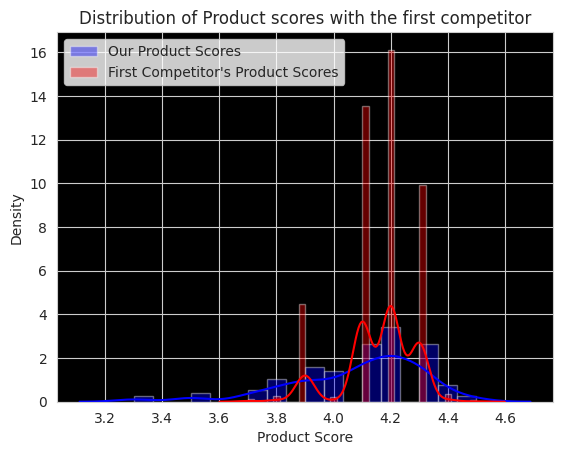

In [ ]:
# Create a distribution plot with scores in different colors
sns.distplot(df['product_score'], label='Our Product Scores')
sns.distplot(df['Competetor1_ProductScore'], label="First Competitor's Product Scores")

# Set the plot style to a white grid
sns.set_style('whitegrid')

# Set the color palette to red and blue
colors = ['#0000ff','#FF0000']
sns.set_palette(sns.color_palette(colors))

# Add labels to the plot
plt.title('Distribution of Product scores with the first competitor')
plt.xlabel('Product Score')
plt.ylabel('Density')

# Set the background color to black
plt.gca().set_facecolor('black')

# Add a legend
plt.legend()

# Show the plot
plt.show()

**As we can see here us and our first competitor most products rating are at around 4.2 and our product rating is normally distrbuted and there is an advantage here that we have as we have some products with a vry high rating more than that of our competitor so our products distribution or varity is much better compared to our competitor !**

### **2)Our prices ditribution & Ratings to our Second competitor**

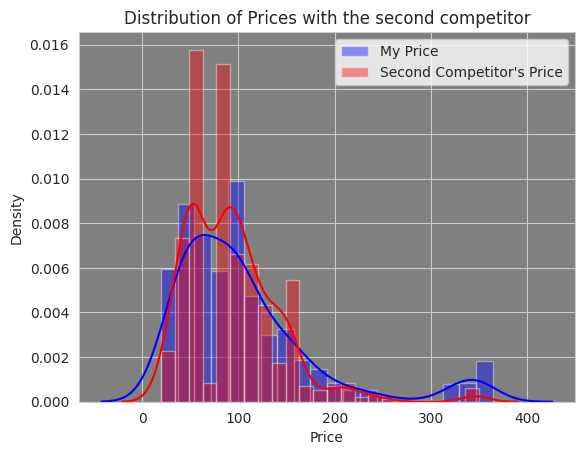

In [ ]:
# Create a distribution plot with prices in different colors
sns.distplot(df['unit_price'], label='My Price')
sns.distplot(df['Competetor2_Price'], label="Second Competitor's Price")

# Set the plot style to a white grid
sns.set_style('whitegrid')

# Set the color palette to red and blue
colors = ['#0000ff','#FF0000']
sns.set_palette(sns.color_palette(colors))

# Add labels to the plot
plt.title('Distribution of Prices with the second competitor')
plt.xlabel('Price')
plt.ylabel('Density')

# Set the background color to grey
plt.gca().set_facecolor('grey')

# Add a legend
plt.legend()

# Show the plot
plt.show()

The distibution of the prices here for the second competitor is really close to the first competitor as we can see most of the products he afford too are of a relative low prices and we stil have more expensive products compared to him too so we can take the same approach we took with the first competitor.

**Let's see the product scores distriuton with him too**

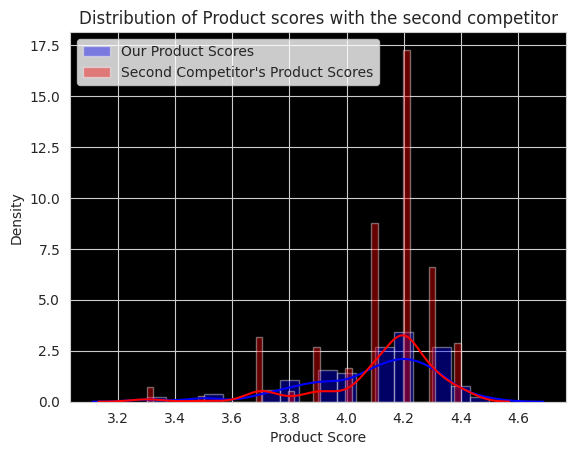

In [ ]:
# Create a distribution plot with scores in different colors
sns.distplot(df['product_score'], label='Our Product Scores')
sns.distplot(df['Competetor2_ProductScore'], label="Second Competitor's Product Scores")

# Set the plot style to a white grid
sns.set_style('whitegrid')

# Set the color palette to red and blue
colors = ['#0000ff','#FF0000']
sns.set_palette(sns.color_palette(colors))

# Add labels to the plot
plt.title('Distribution of Product scores with the second competitor')
plt.xlabel('Product Score')
plt.ylabel('Density')

# Set the background color to black
plt.gca().set_facecolor('black')

# Add a legend
plt.legend()

# Show the plot
plt.show()

Again our product scores are much better when it comes to distribution even here we can see that some of our second competitor products have a very low rating which is bad so the win is ours here when it comes to scores people loves our products !

**So as we know that the rating of a product is a big factor of it's sales that's why we can do some great stuff to avoid the bad rankings as the second competitor did here :**

-Make sure that the products are in good case no scratches ,breaks or any problems with them.

-We need to make sure of the suppliers we deal with to get the products with the best quality we can.

-Always take surveys from the people about the products to keep the products that people loves as we are doing now !


###**3)Our prices ditribution & Ratings to our third competitor**

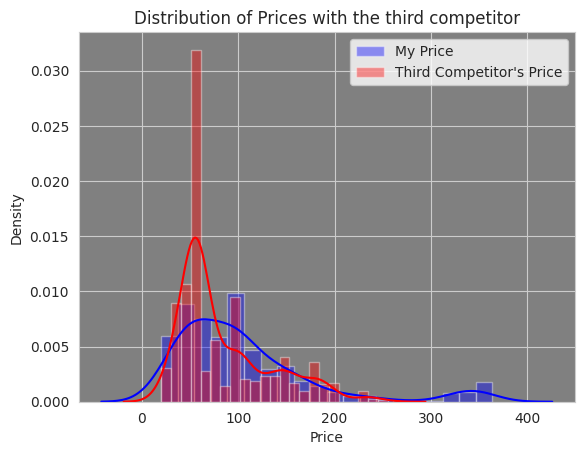

In [ ]:
# Create a distribution plot with prices in different colors
sns.distplot(df['unit_price'], label='My Price')
sns.distplot(df['Competetor3_Price'], label="Third Competitor's Price")

# Set the plot style to a white grid
sns.set_style('whitegrid')

# Set the color palette to red and blue
colors = ['#0000ff','#FF0000']
sns.set_palette(sns.color_palette(colors))

# Add labels to the plot
plt.title('Distribution of Prices with the third competitor')
plt.xlabel('Price')
plt.ylabel('Density')

# Set the background color to grey
plt.gca().set_facecolor('grey')

# Add a legend
plt.legend()

# Show the plot
plt.show()

**The third competitor is our real threat here when it comes to the pricing his prices distribution indicates that all of his/her products are affordable not that expensive we can see that more than 50% of his products are for less that 100 $ so we need to deal with this to keep competing with them.**

-We can check the prices of the products that we sell for higher prices and search for better suplliers to sell us these expensive products we sell for a better price.

-We can take the same approach mentioned with the first competitor which is putting this expensive stuff with a cheap product as a bundle or an offer which can grab more people to buy this stuff .

**Let's see the product scores distriuton with him too**

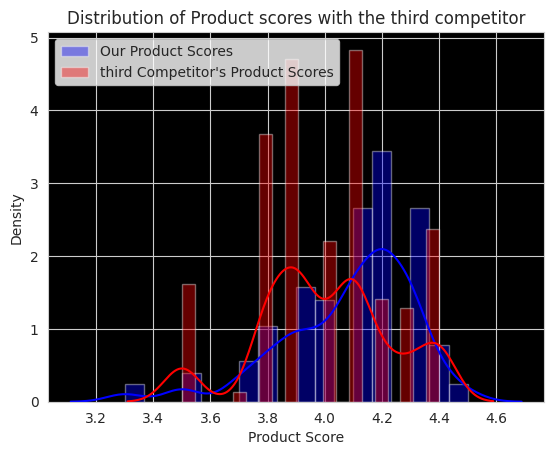

In [ ]:
# Create a distribution plot with scores in different colors
sns.distplot(df['product_score'], label='Our Product Scores')
sns.distplot(df['Competetor3_ProductScore'], label="third Competitor's Product Scores")

# Set the plot style to a white grid
sns.set_style('whitegrid')

# Set the color palette to red and blue
colors = ['#0000ff','#FF0000']
sns.set_palette(sns.color_palette(colors))

# Add labels to the plot
plt.title('Distribution of Product scores with the third competitor')
plt.xlabel('Product Score')
plt.ylabel('Density')

# Set the background color to black
plt.gca().set_facecolor('black')

# Add a legend
plt.legend()

# Show the plot
plt.show()

**Again our product scores are saving us !**

Our product scores distribution is much better than this competitor scores what can this tell us ?

**We might sell products for higher prices but surley our quality is perfect and that's why we might buy stuff for more expensive prices than our competitor so we can make sure that people know about our high quality which will surley grab more customers as we said .**

##3.6)**Years and months with the most orders**

**Let's check what is the year we sold products in the most ?**

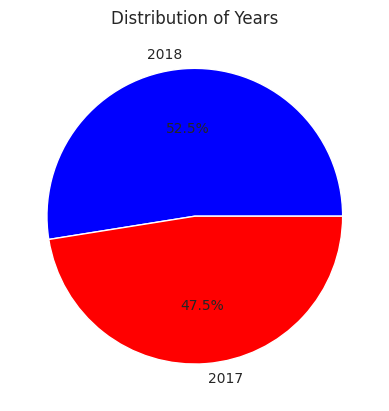

In [ ]:
# Count the occurrences of each year
year_counts = df['year'].value_counts()

# Create a pie chart
plt.pie(year_counts, labels=year_counts.index, autopct='%1.1f%%')

# Add a title
plt.title('Distribution of Years')

# Show the plot
plt.show()

**The orders increased in 2018 which is a great sign and it can indicate that the store's popularity is increasing which is great !**

**Now Let's check what is the month we sold products in the most ?**

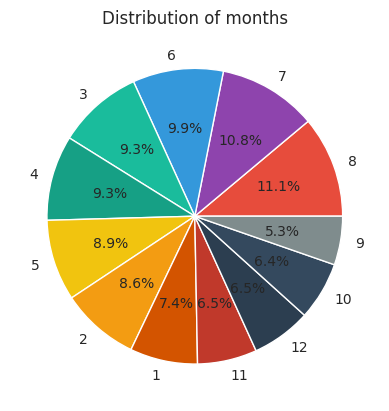

In [ ]:
# Count the occurrences of each month
month_counts = df['month'].value_counts()

# Set a different color for each month
colors = ['#e74c3c', '#8e44ad', '#3498db', '#1abc9c', '#16a085', '#f1c40f', '#f39c12', '#d35400', '#c0392b', '#2c3e50', '#34495e', '#7f8c8d']

# Create a pie chart
plt.pie(month_counts, labels=month_counts.index, autopct='%1.1f%%',colors=colors)

# Add a title
plt.title('Distribution of months')

# Show the plot
plt.show()

**We can see that augest and july are the months with the most orders and this can explain the sells of the garden tools augest is a great month for planting some special seeds which can really explain the graphs above and also September is the best season to start harvesting and that's why the people are buying gardening tools in Augest before September !**

##3.7)**Customers depending on the price and the shipping price of the product**

**How does the price affect the number of customers ?**

Text(0.5, 1.0, 'No. of customers depending on price')

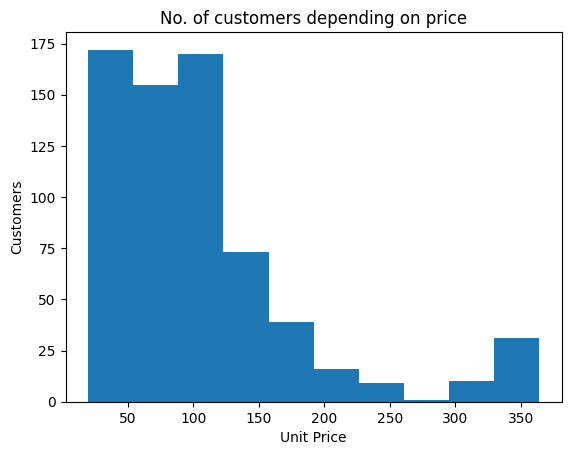

In [ ]:
plt.hist(df.sort_values('customers')['unit_price'])
plt.xlabel('Unit Price')
plt.ylabel('Customers')
plt.title('No. of customers depending on price')

**What can we see from this visualization ?**

-As expected for the low price products we can see more customers.

-there are some of the most expensive products that have customers more than the cheaper ones but this is ordinary maybe this item is really needed like the health5 product which was needed alot.

Text(0.5, 1.0, 'No. of customers depending on freight price')

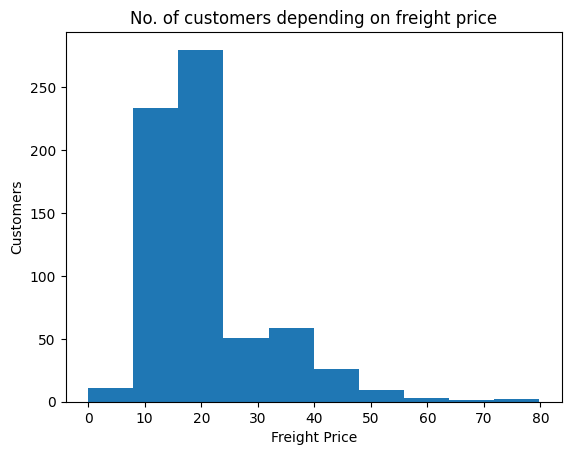

In [ ]:
plt.hist(df.sort_values('customers')['freight_price'])
plt.xlabel('Freight Price')
plt.ylabel('Customers')
plt.title('No. of customers depending on freight price')

**What can we see from this visualization ?**

-As expected for the low price of shipping we can see more customers.



##3.8) **How can the number of the pictures for a product affect it ?**

**If i am a customer i would love to see many photos of the product before buying it so let's check this !**

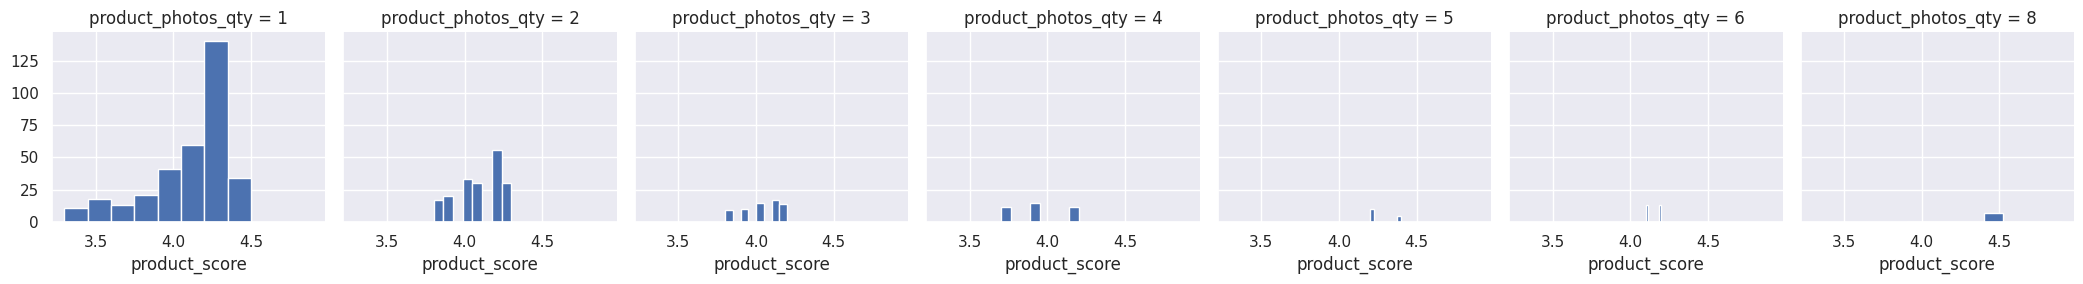

In [ ]:
g = sns.FacetGrid(df, col='product_photos_qty')
g.map(plt.hist, 'product_score', bins=8)

**What can we see from this visualization ?**

-Most of our products contains only 1 or 2 pictures that are being displayed.

-When the number of pictures increased like in the case of 8 pictures all the scores was at the max which shows how important the pictures are to the people .

**What can we do then ?**

-Make sure to use the social media or our web sites to display as many pictures as possible for our products to get better ratings which will for sure lead to better profit !

## 3.9) **Time realted analysis**

**We can really get valuable insights on seeing the sales of the products or the competitors sales and pricing through the year this part is considered very important to us so let's get into it !**

In [ ]:
#Setting the index to be the date
df['month_year']=pd.to_datetime(df["month_year"], dayfirst=True)
data=df.set_index('month_year')

**First let us check the unit price for each product between our prices and the competitors prices**

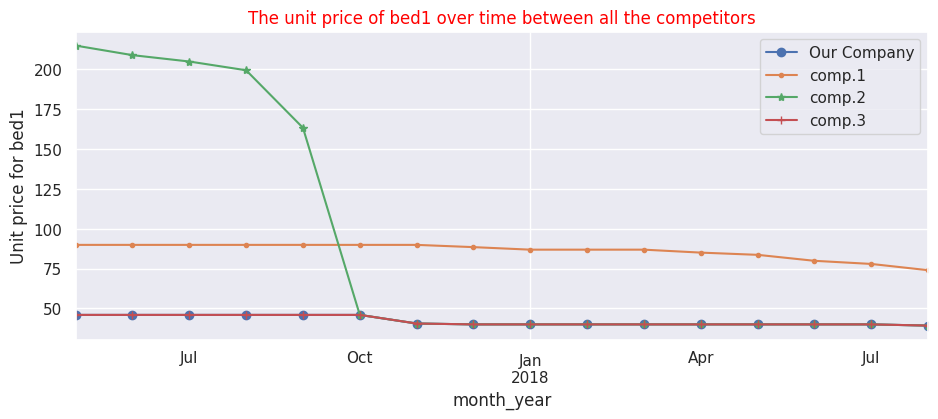

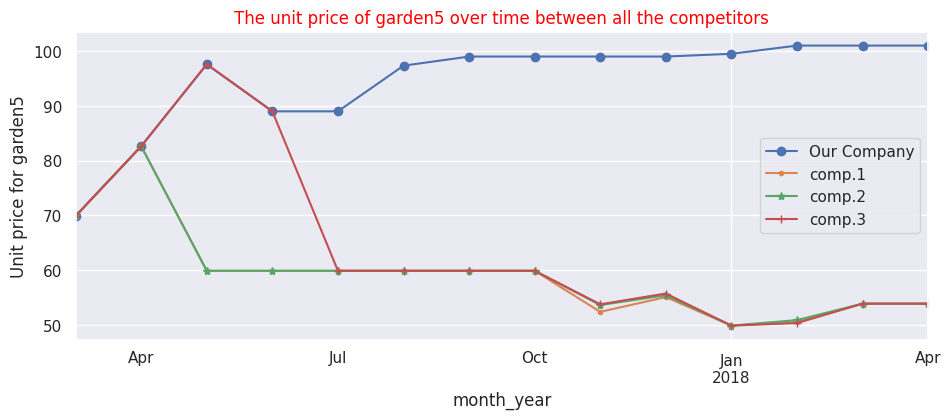

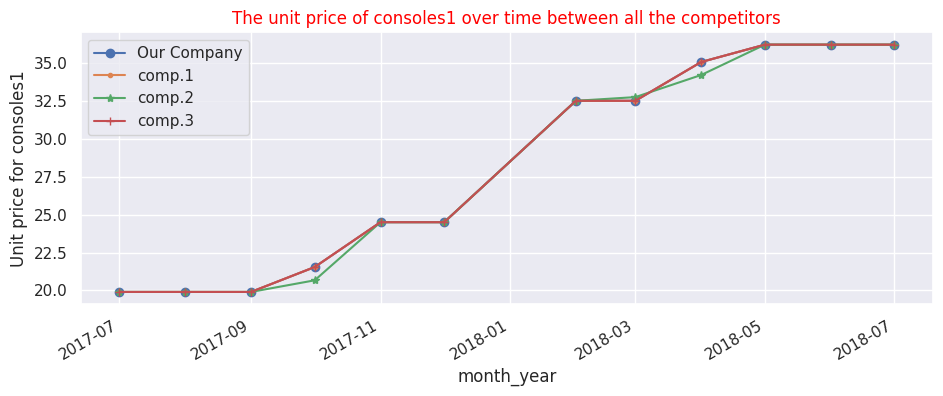

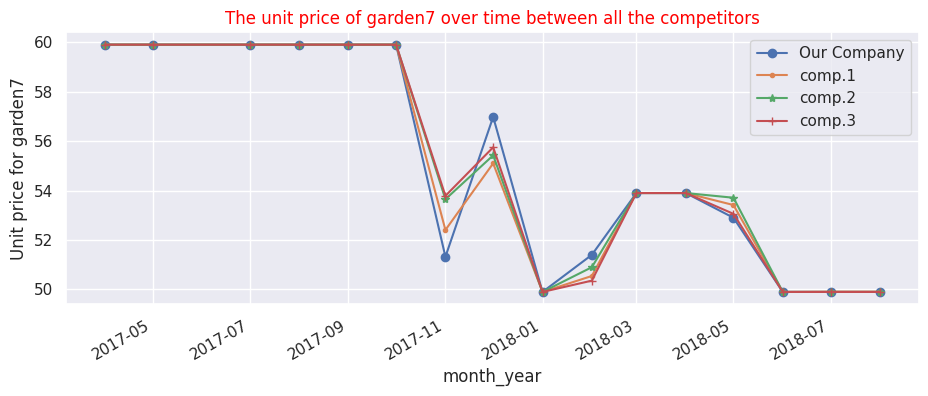

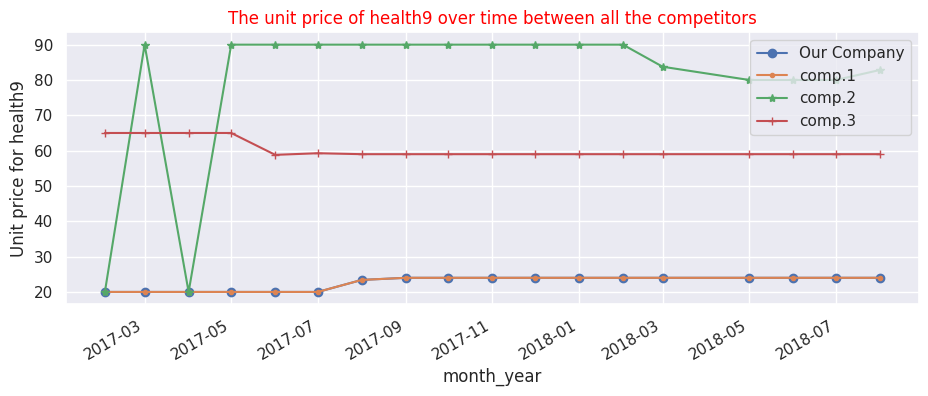

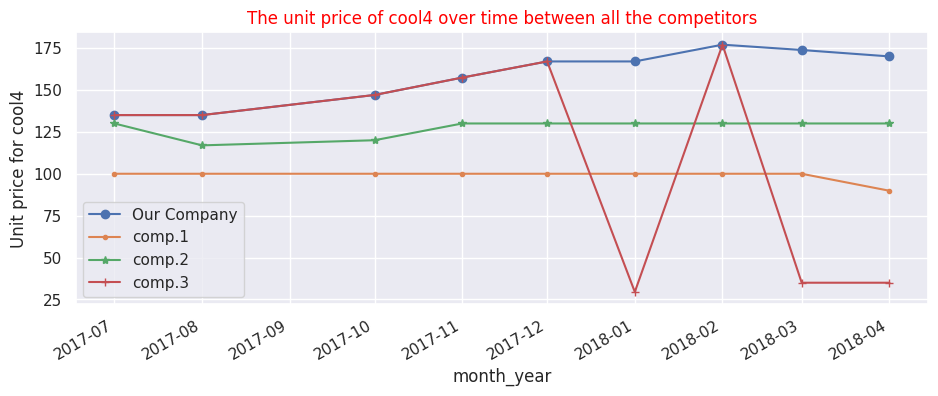

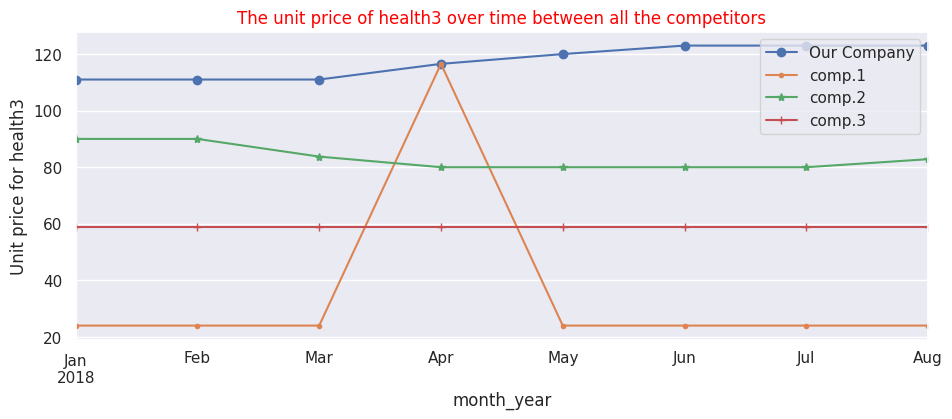

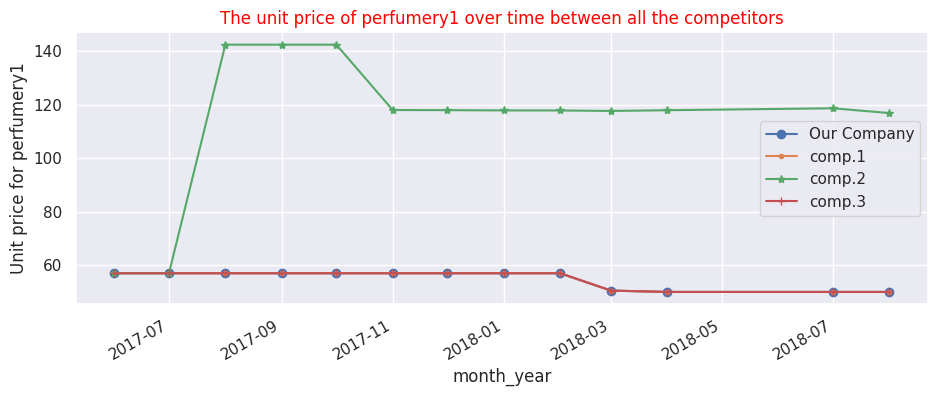

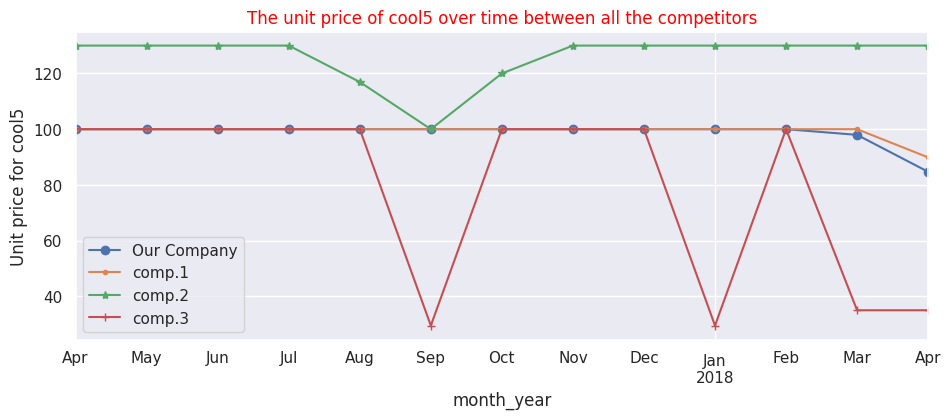

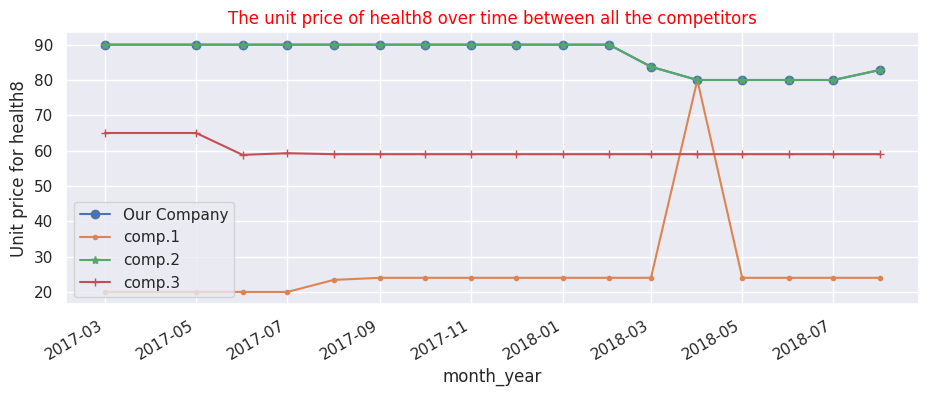

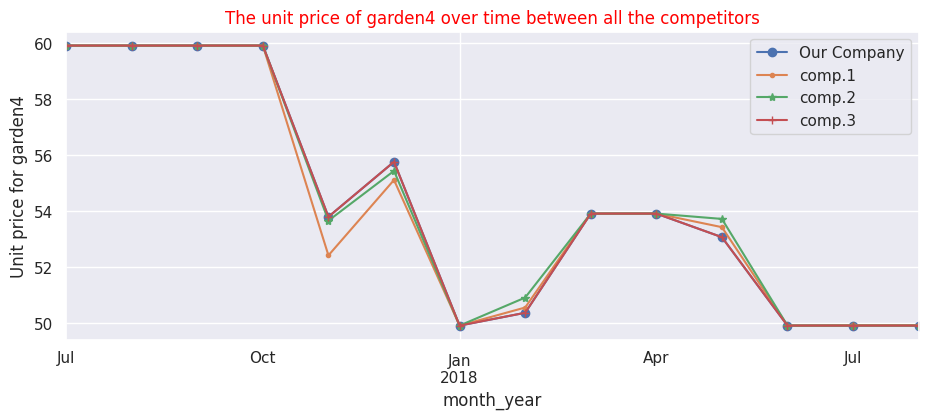

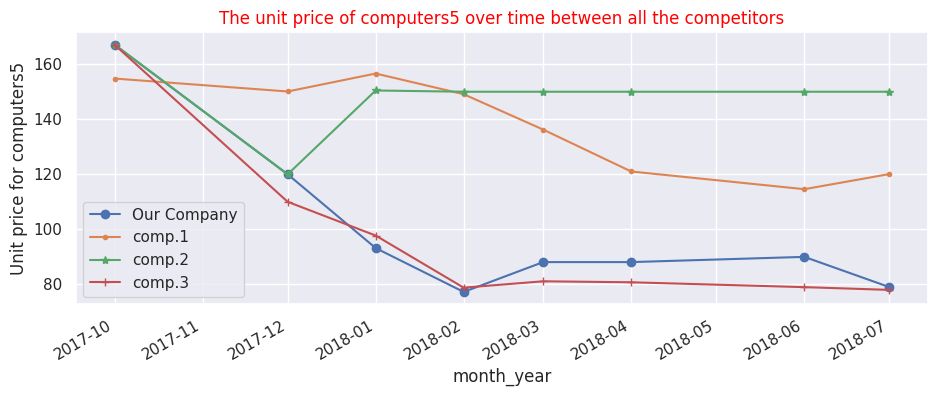

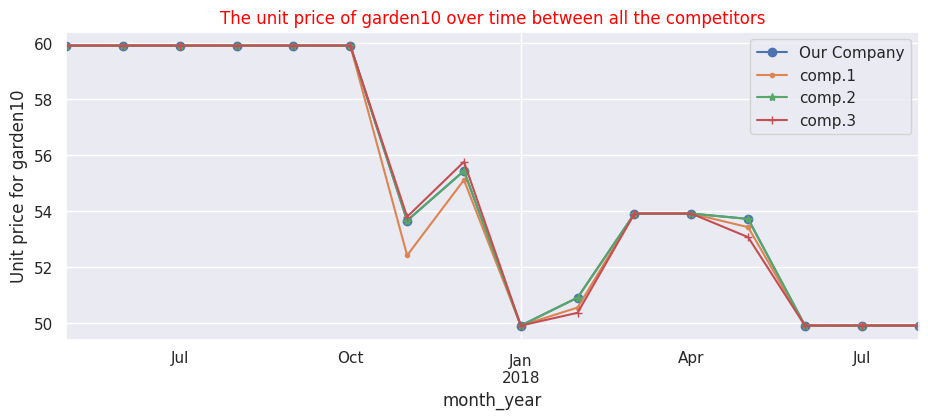

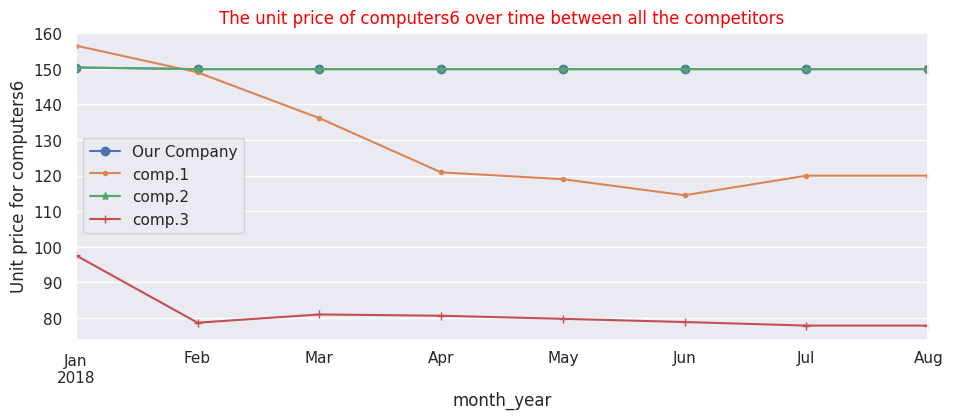

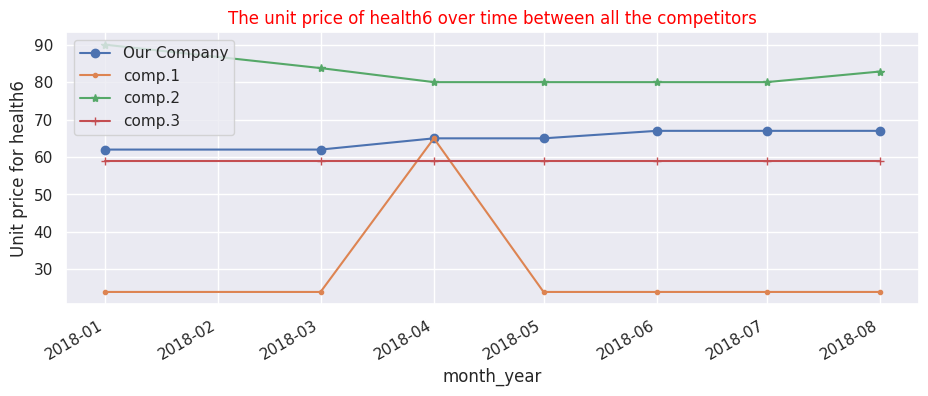

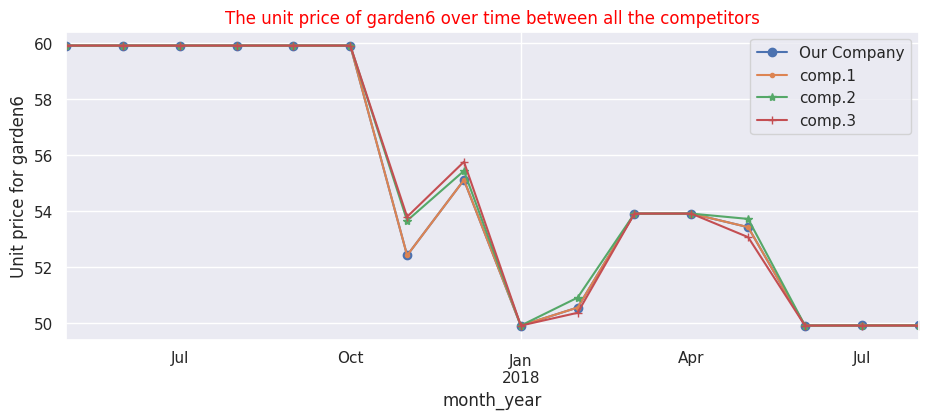

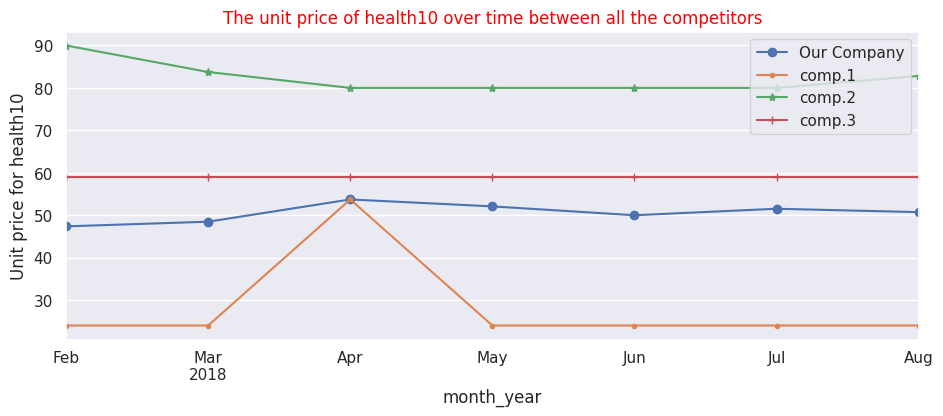

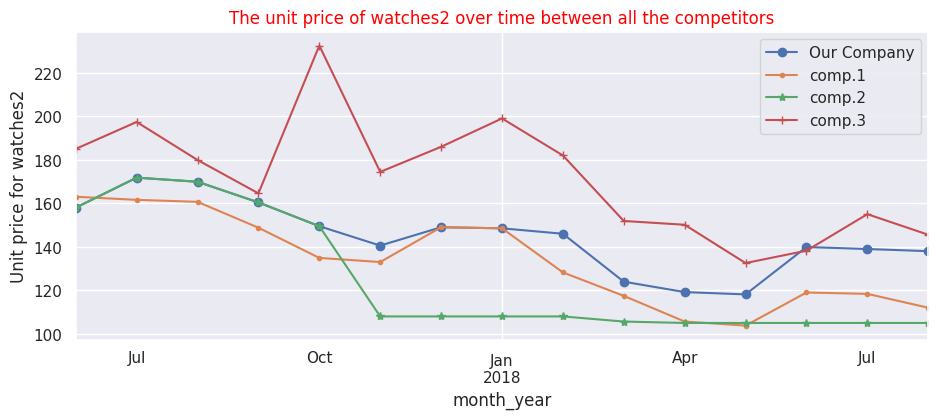

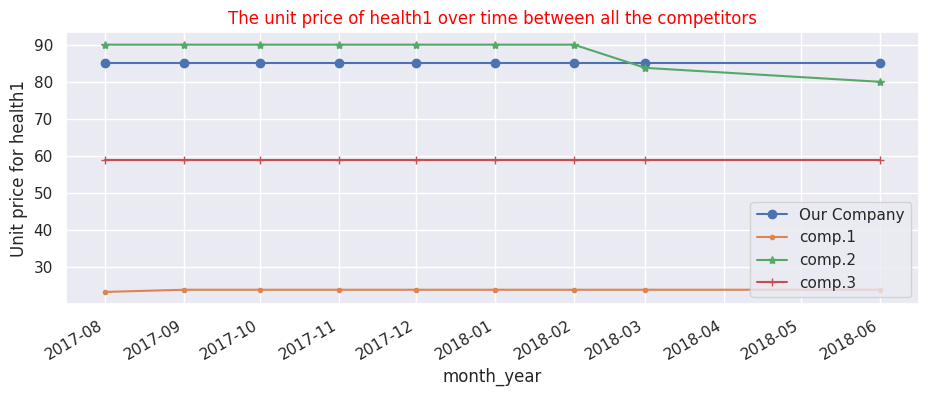

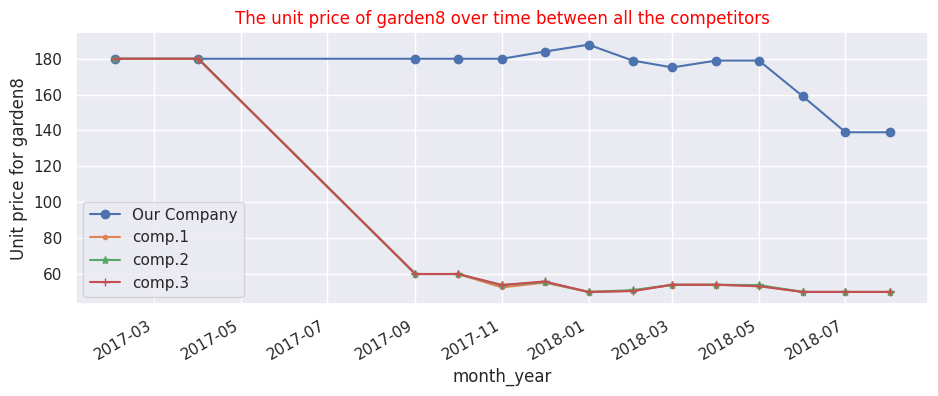

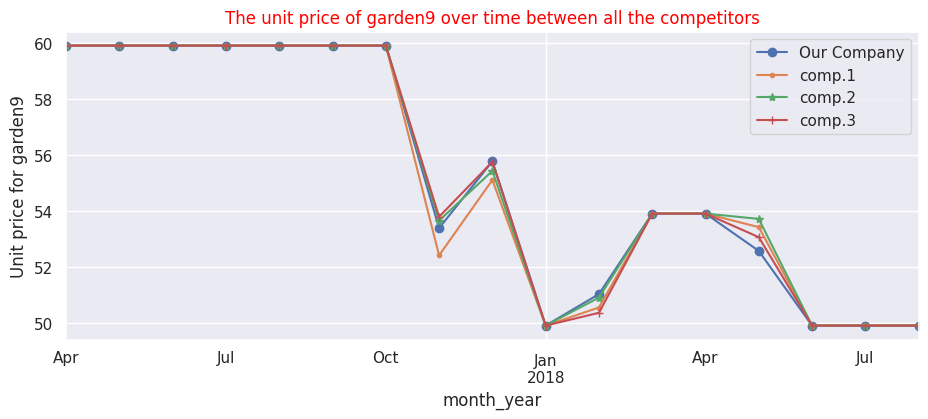

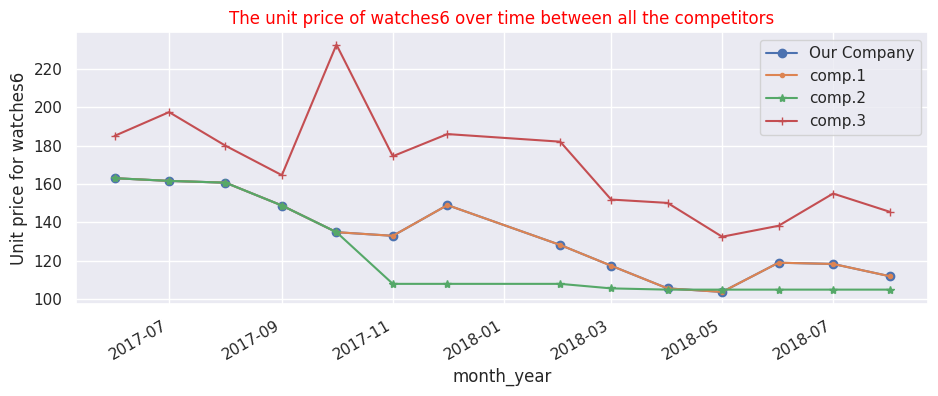

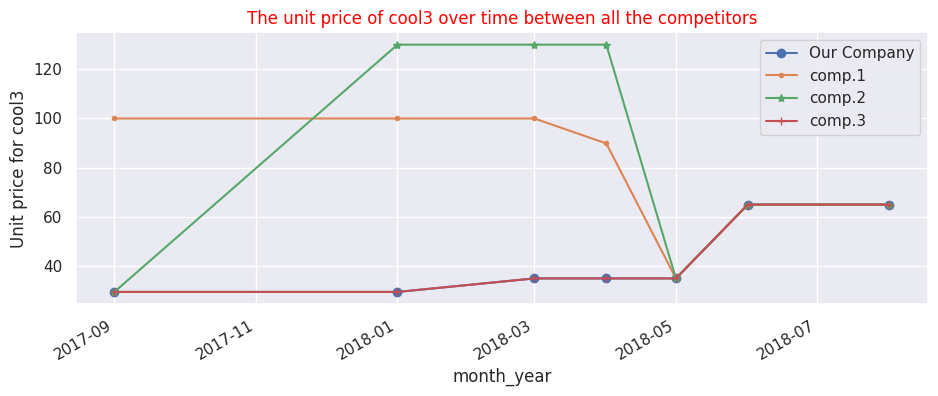

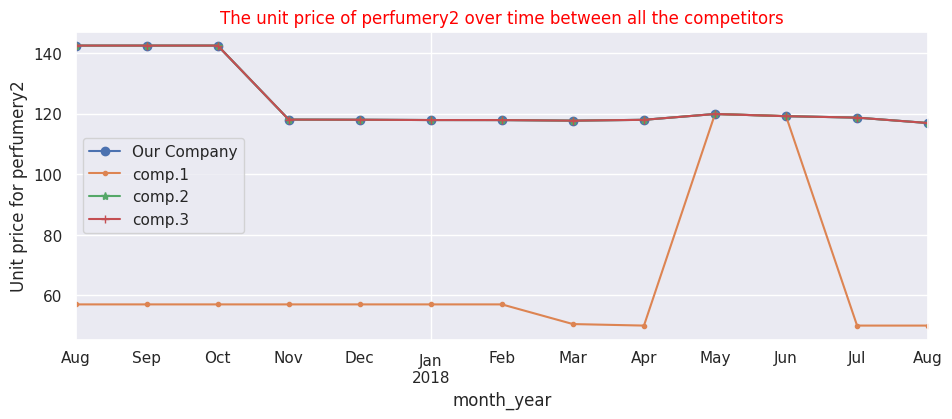

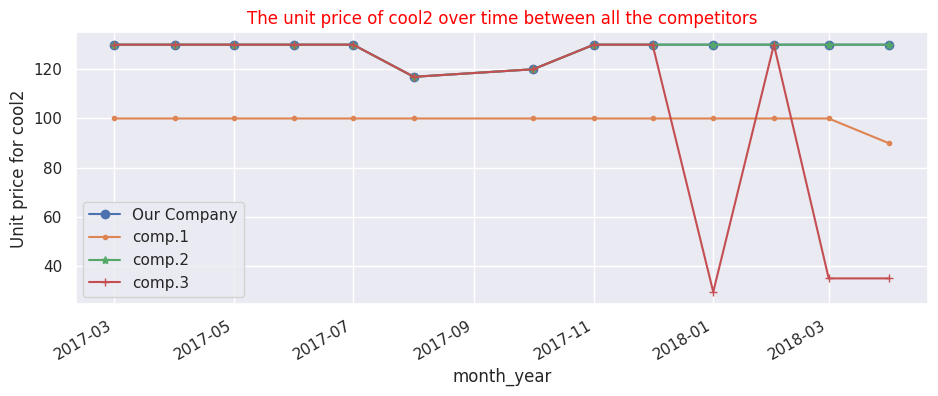

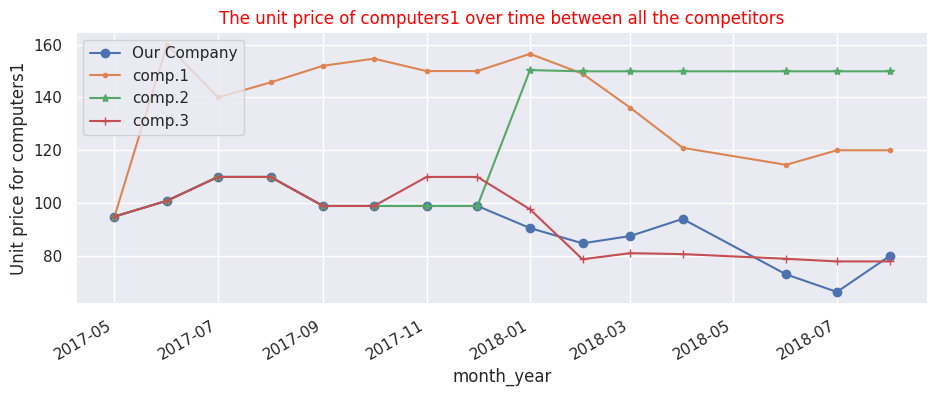

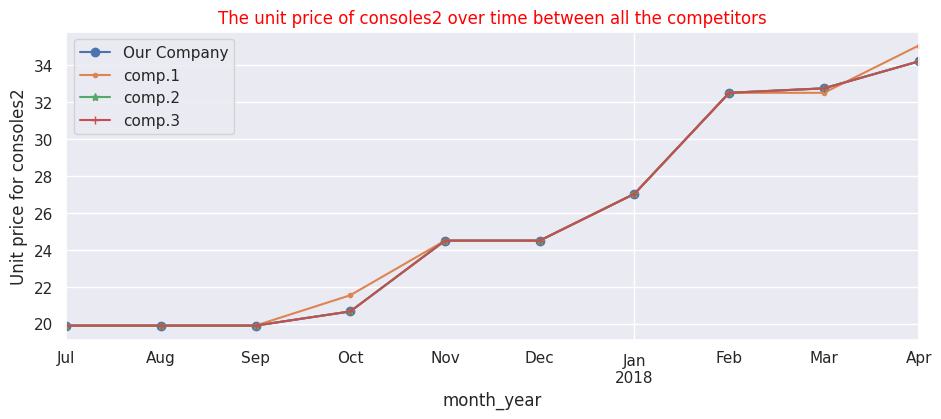

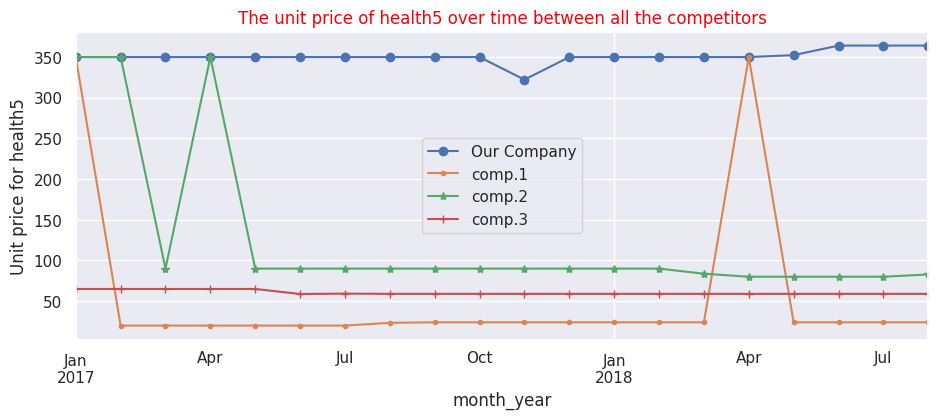

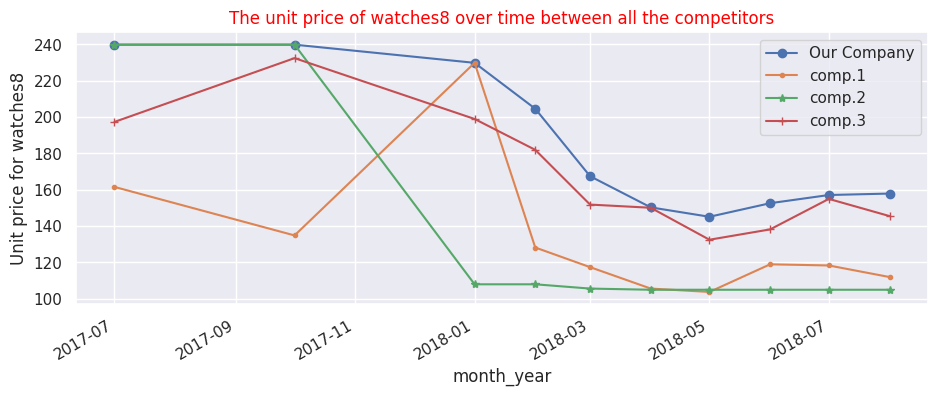

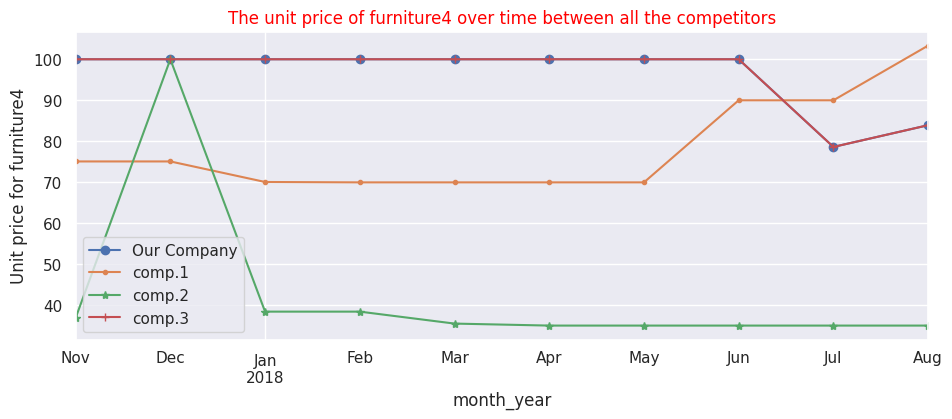

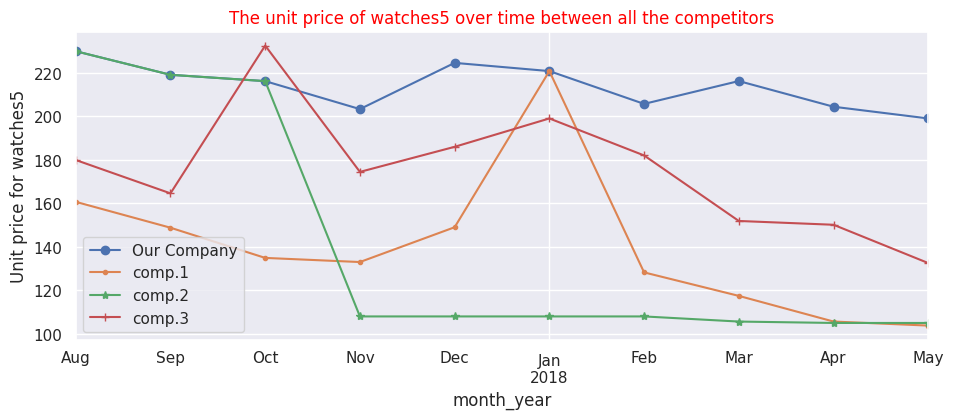

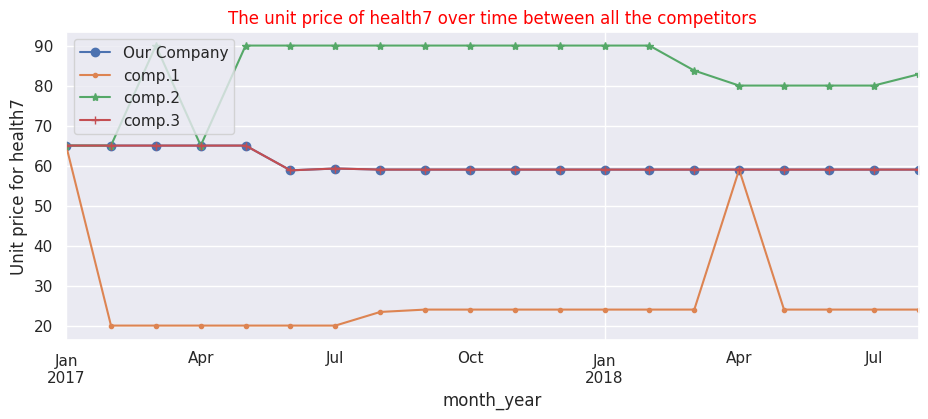

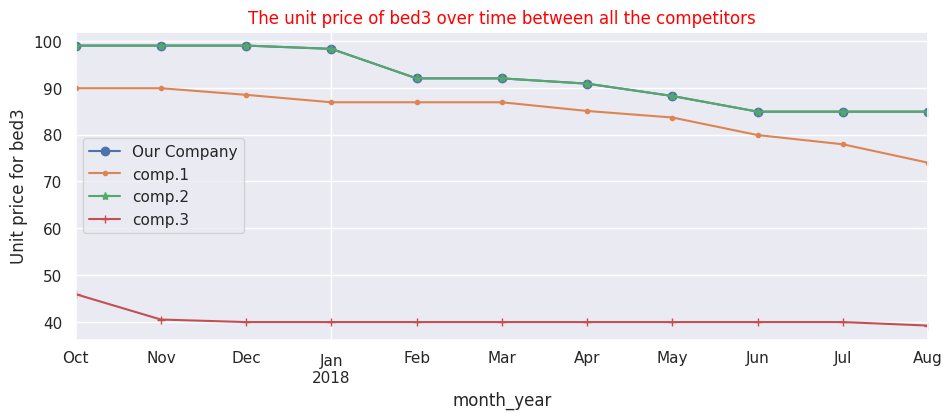

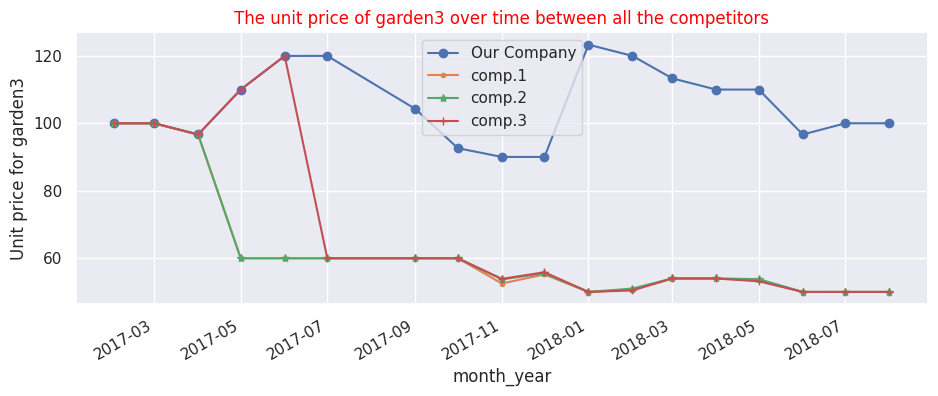

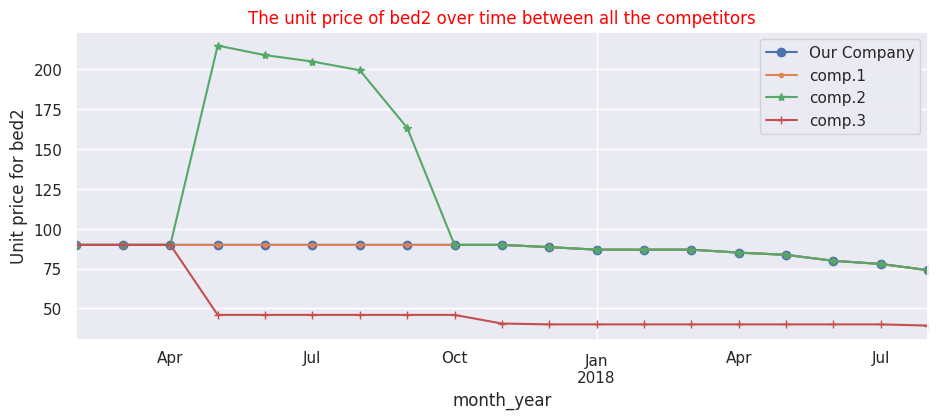

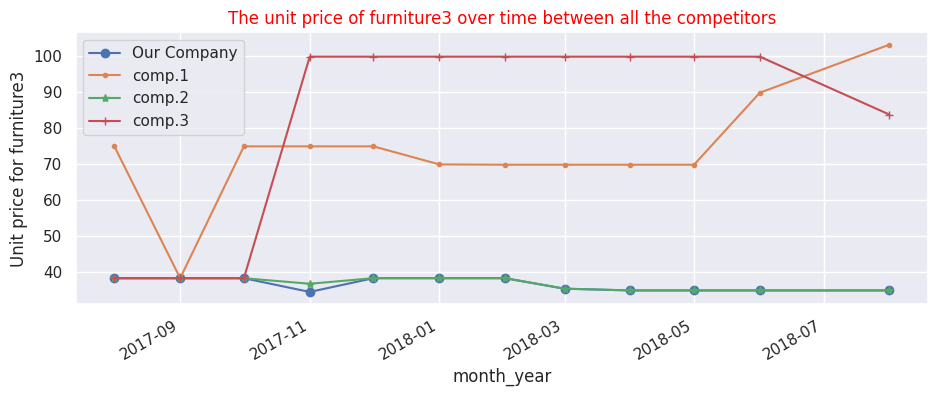

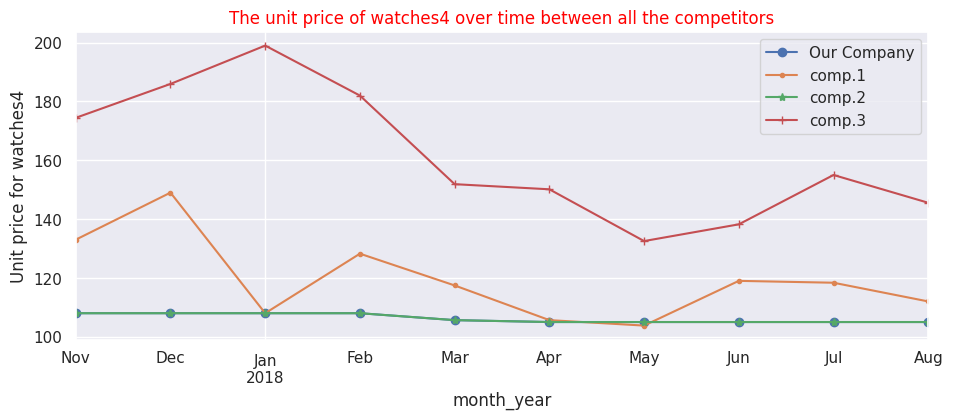

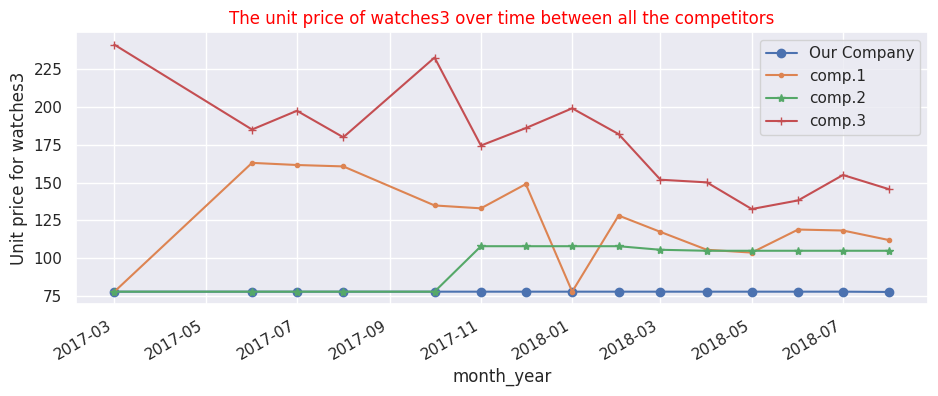

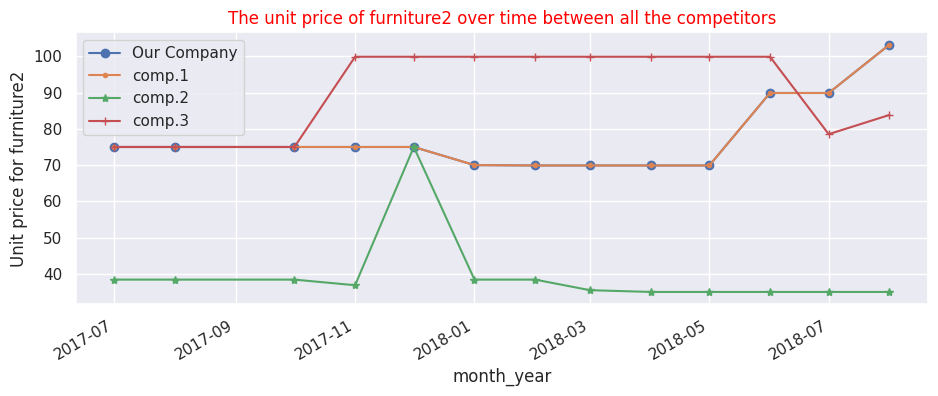

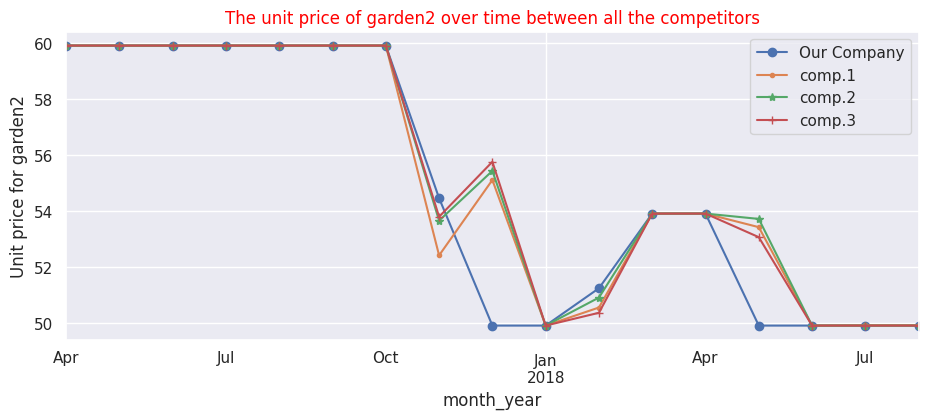

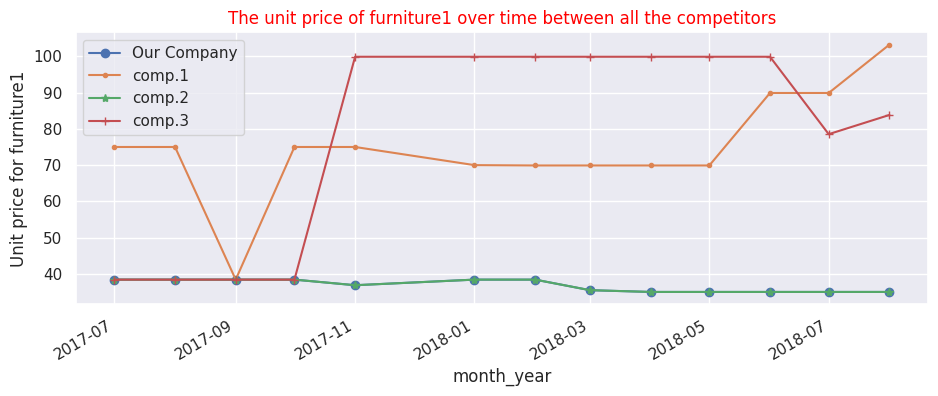

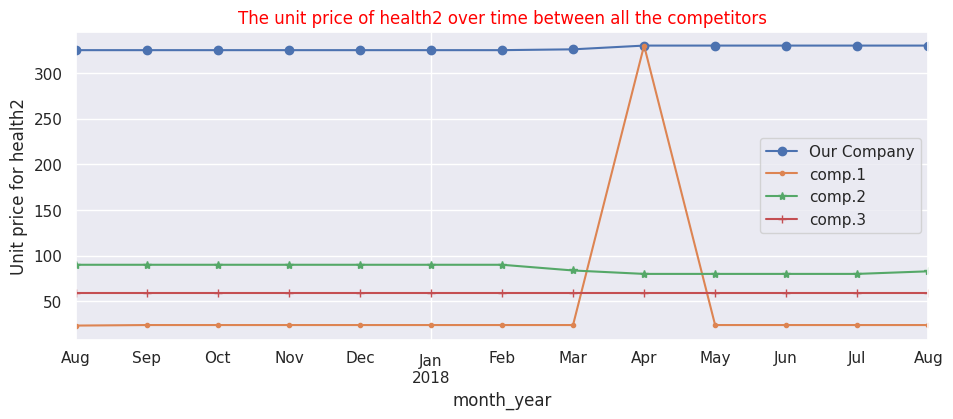

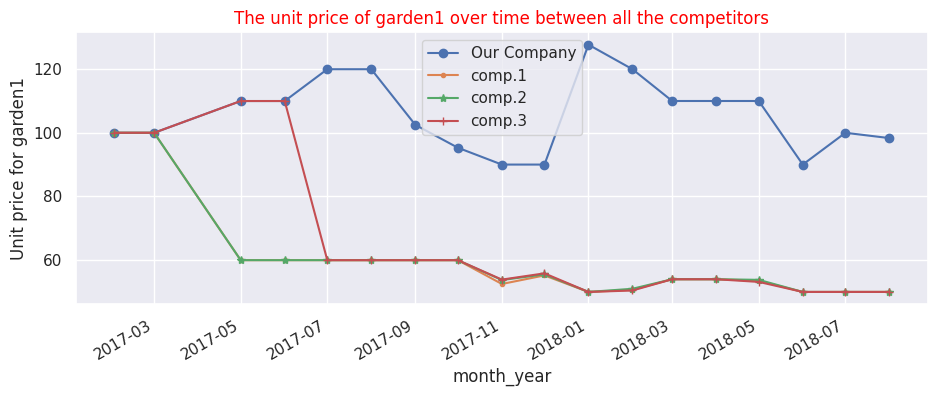

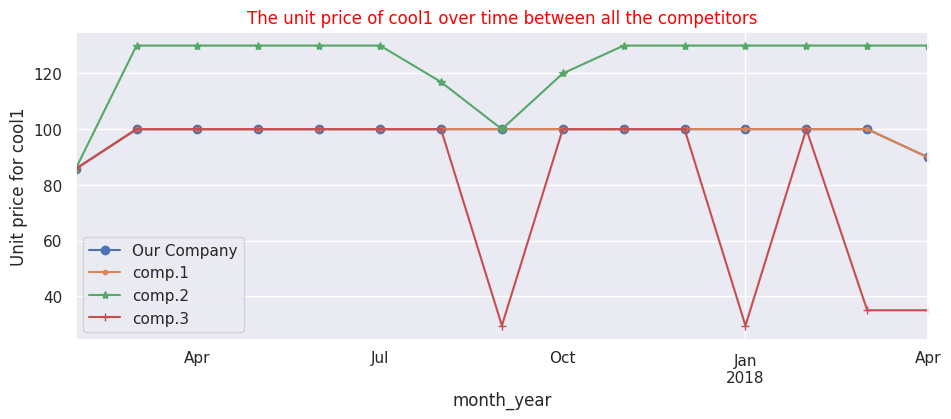

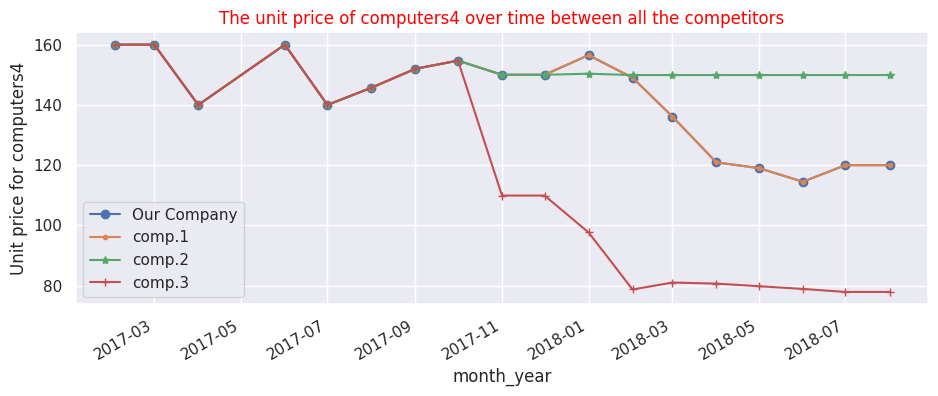

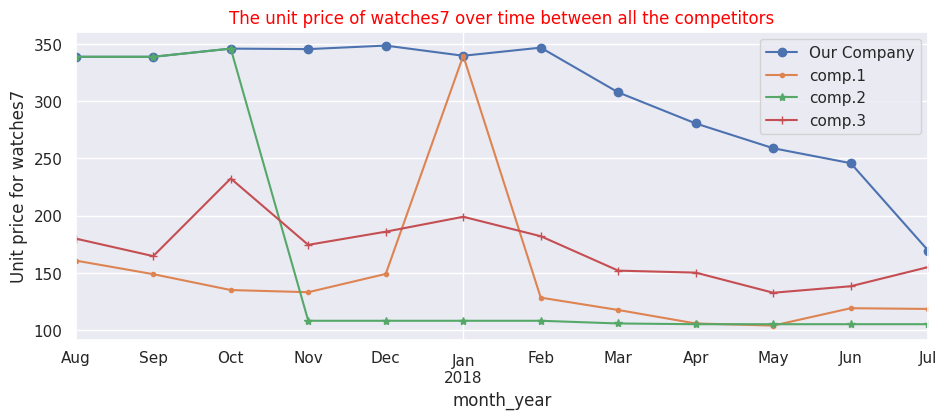

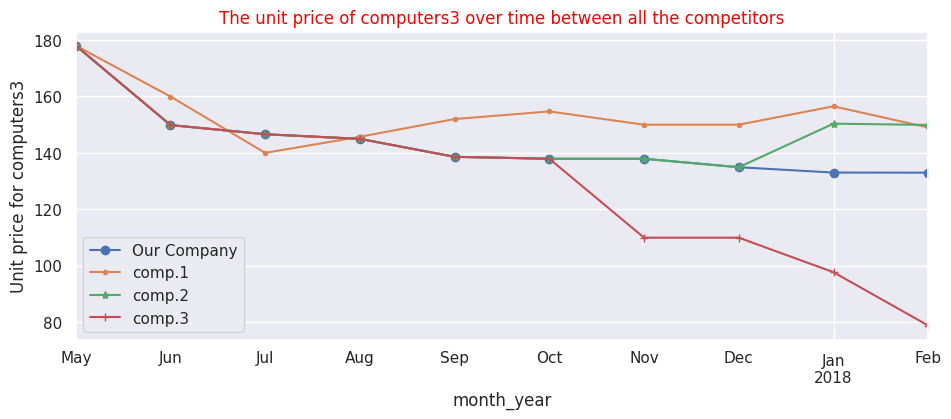

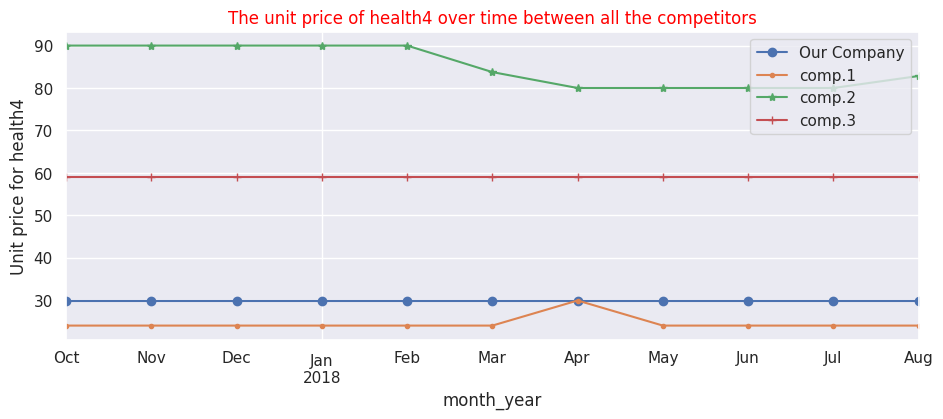

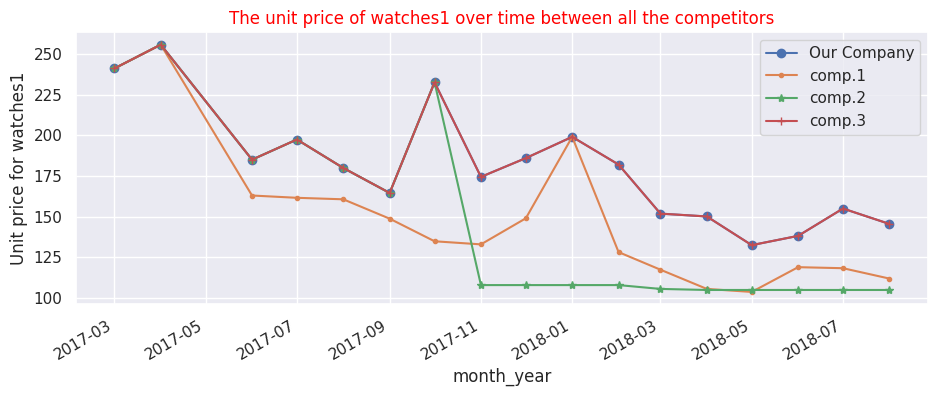

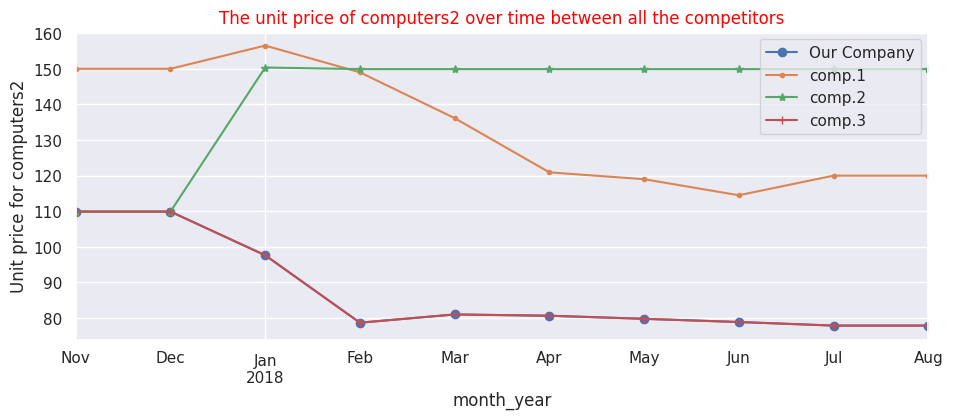

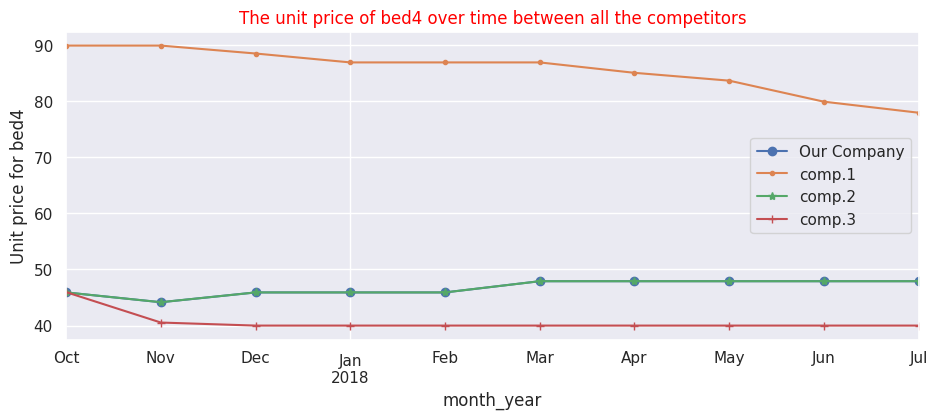

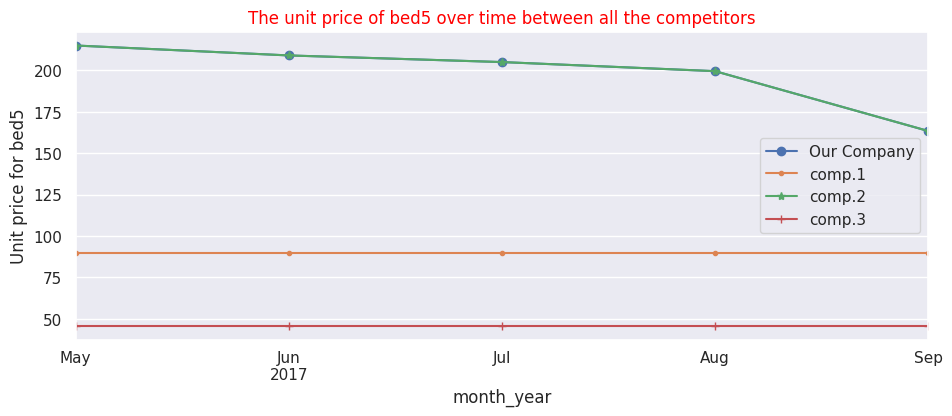

In [ ]:
products=data["product_id"].unique()
for i in range(len(products)):
    u=data[data["product_id"]==products[i]]
    plt.figure()
    sns.set(rc={'figure.figsize':(11, 4)})
    ax = u.loc[:, 'unit_price'].plot(marker='o', linestyle='-',label='Our Company')
    ax = u.loc[:, 'Competetor1_Price'].plot(marker='.', linestyle='-',label='comp.1')
    ax = u.loc[:, 'Competetor2_Price'].plot(marker='*', linestyle='-',label='comp.2')
    ax = u.loc[:, 'Competetor3_Price'].plot(marker='+', linestyle='-',label='comp.3')
    ax.set_ylabel('Unit price for '+products[i])
    ax.legend()
    plt.title("The unit price of "+products[i]+" over time between all the competitors",color="red")
    plt.show()

**What can we conclude or what actions can we take after seeing this ?**

-We have many products that we used to sell or even still selling for prices which are considered expensive comparing to our competitors we can see that for the garden tools for example we really sell them for a huge amount of money yet many customers buy them from us which can prove our quality !


-All the competitors are dangerous when it comes to some products but the closest to us in the prices is competitor 2 and then comes 3 so we need to take actions to keep ruling the field.

**Now let's look at the shipping prices comparison**

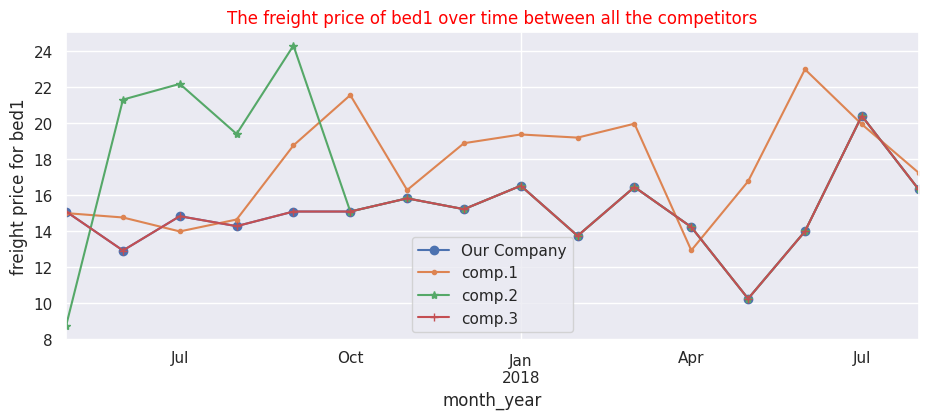

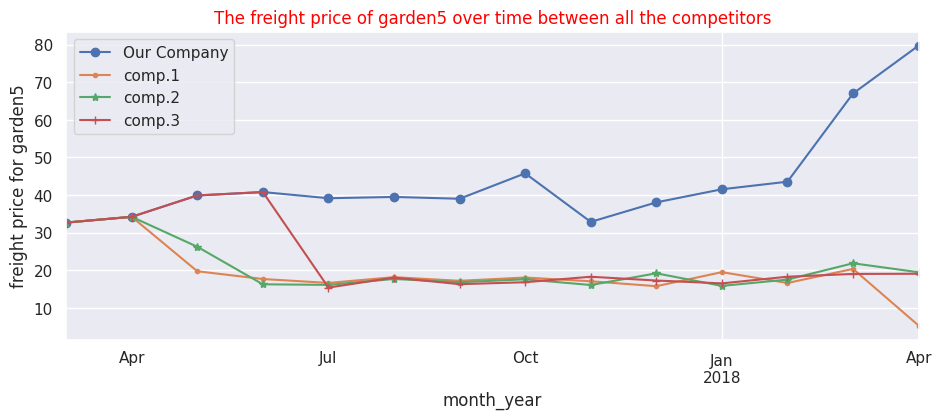

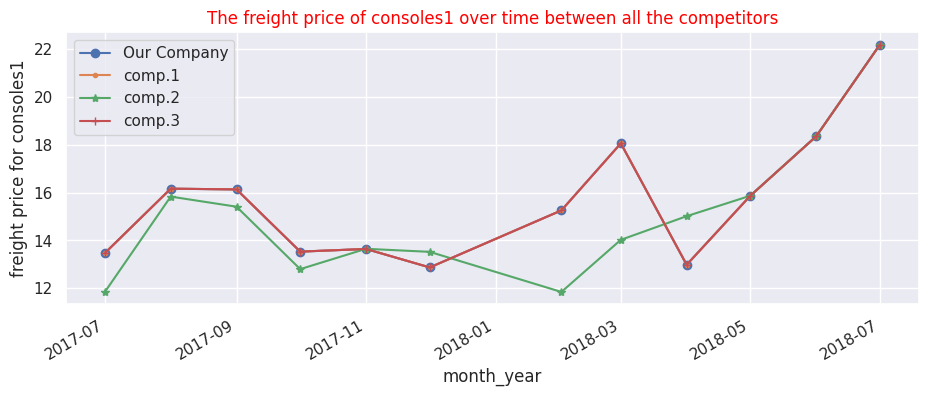

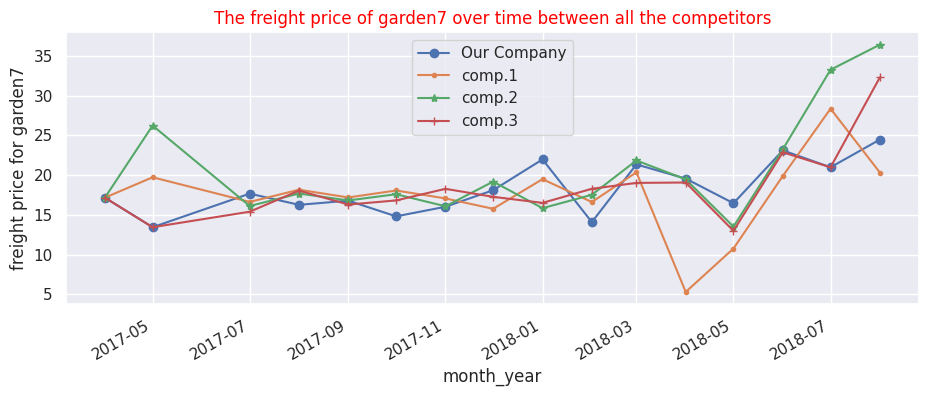

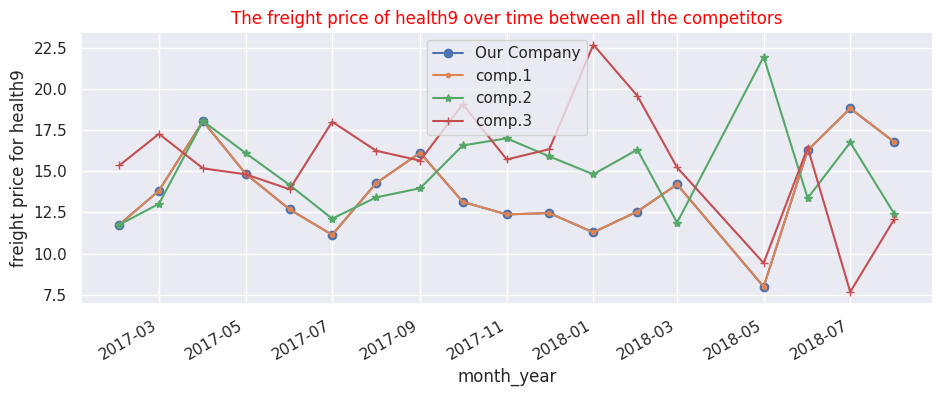

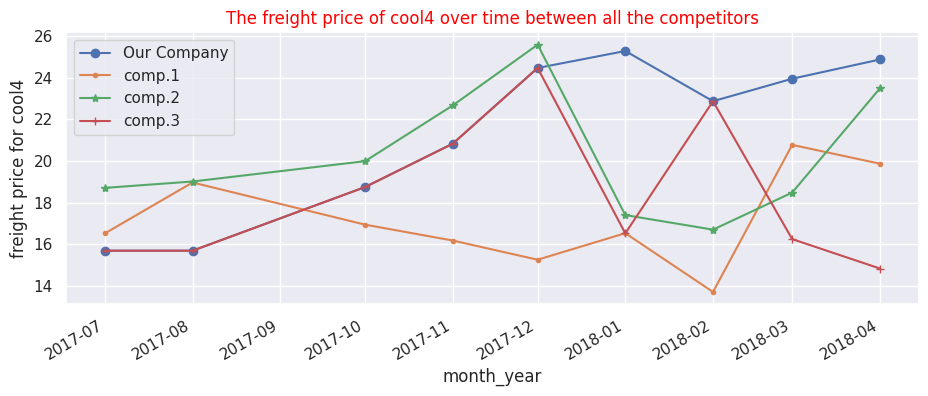

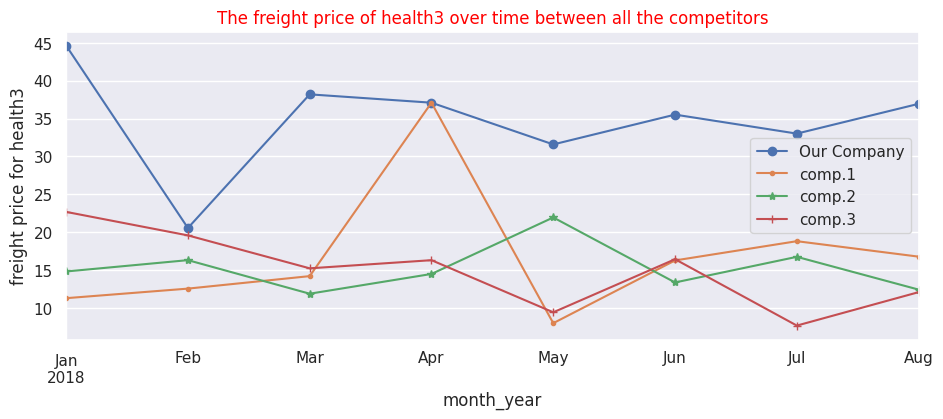

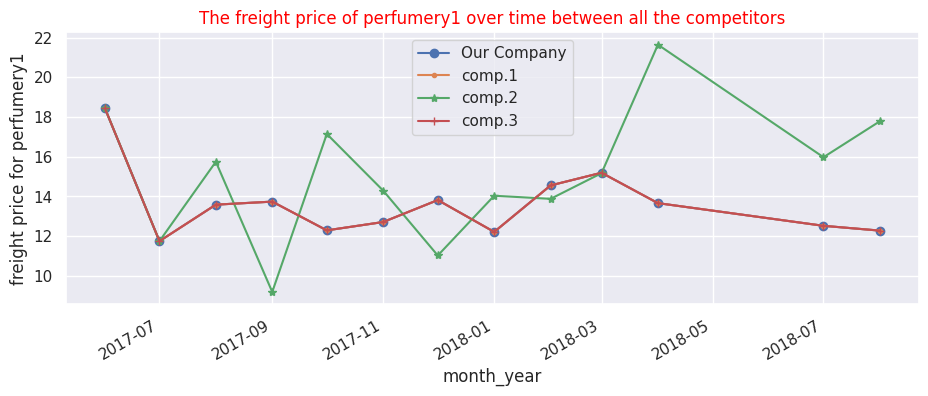

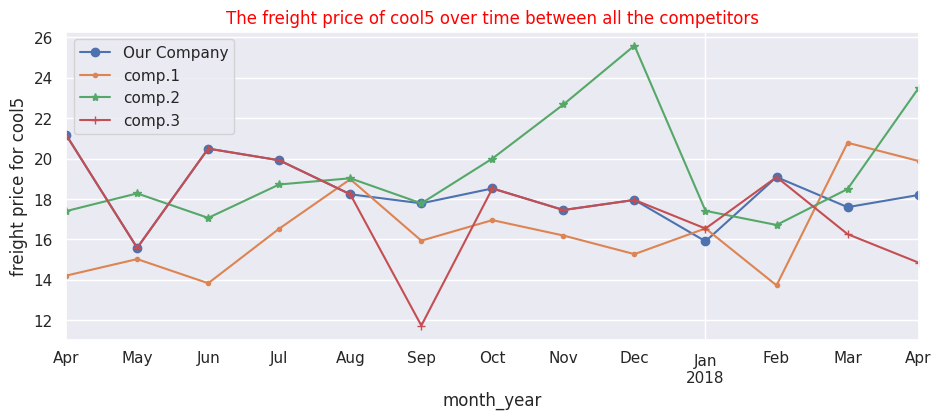

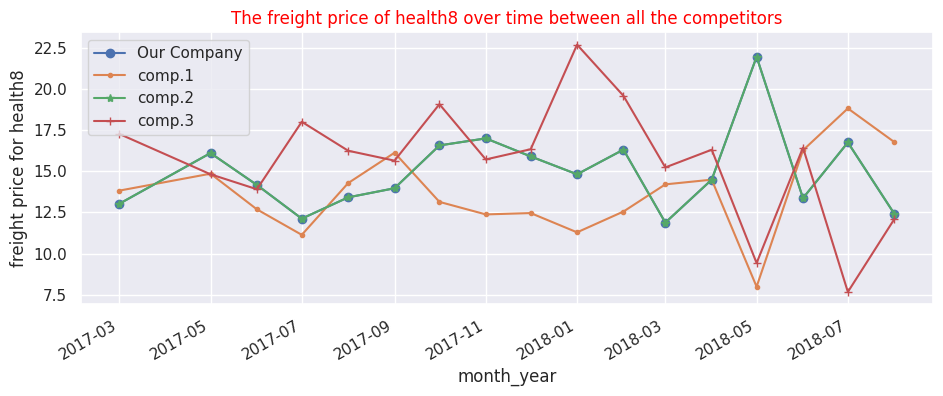

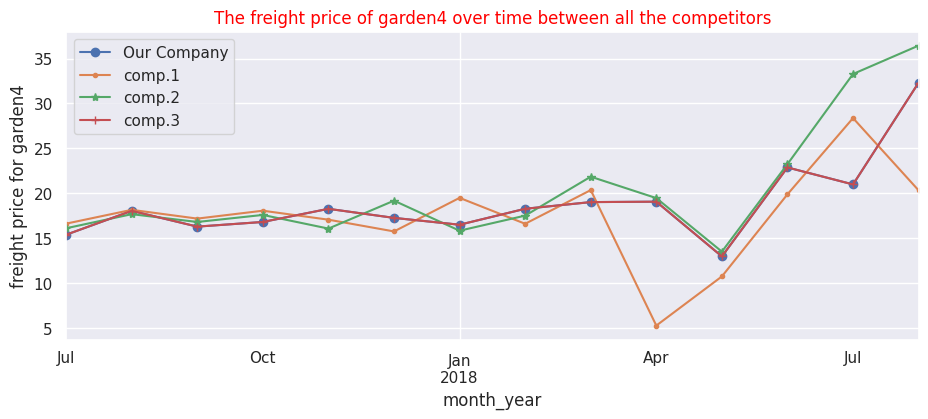

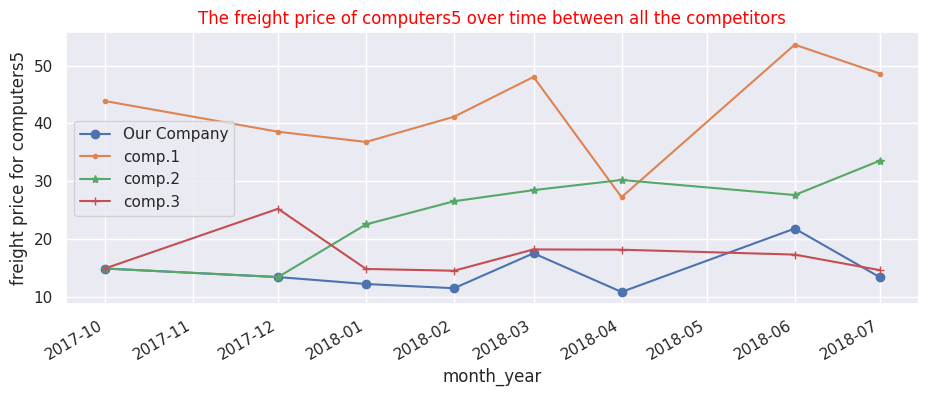

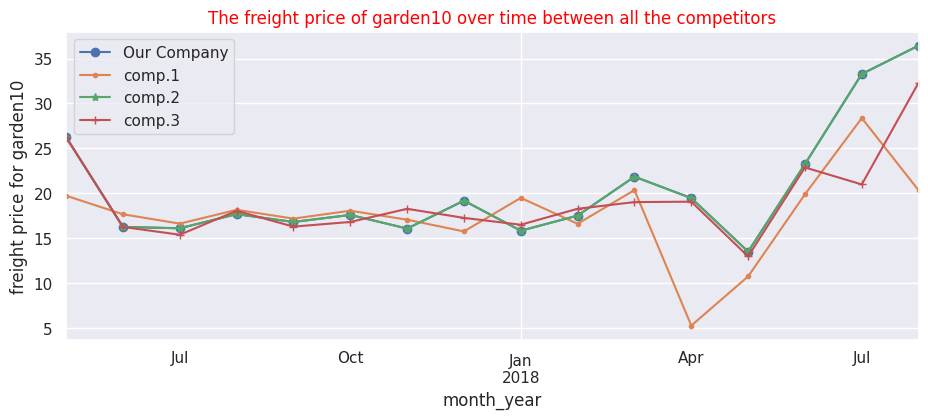

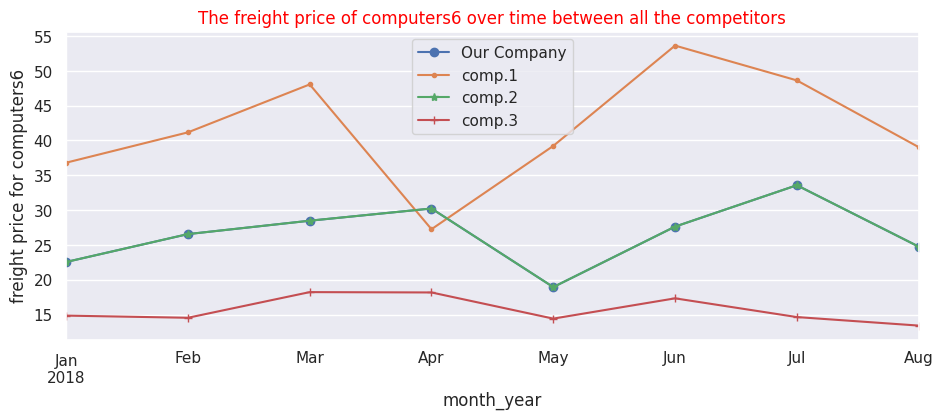

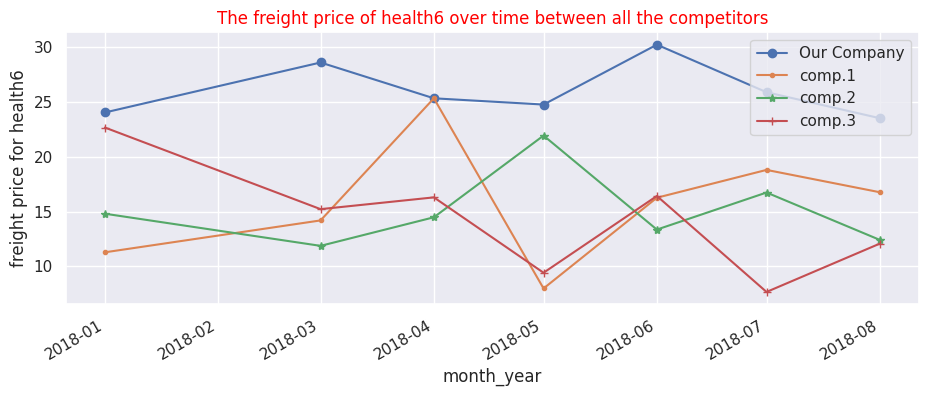

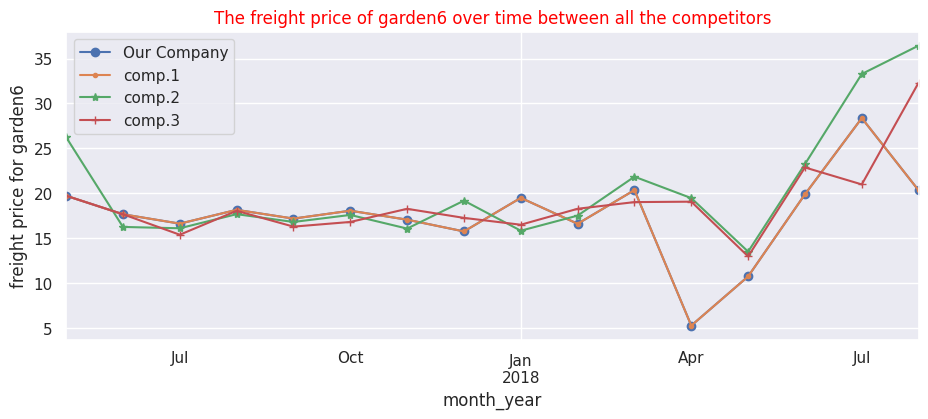

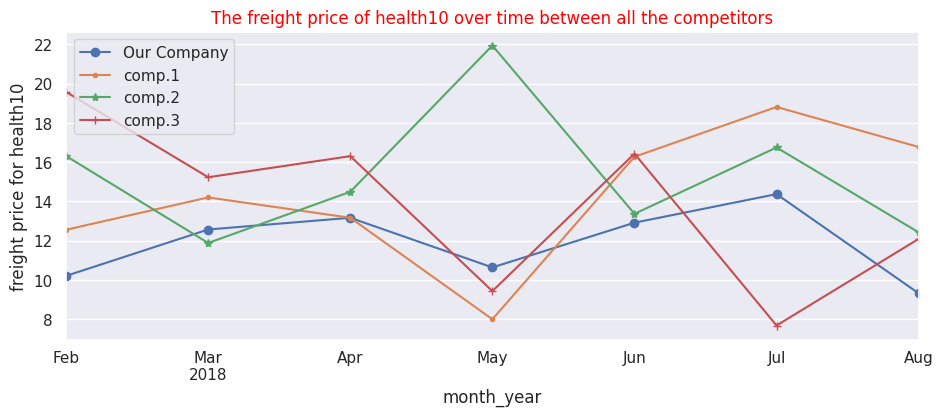

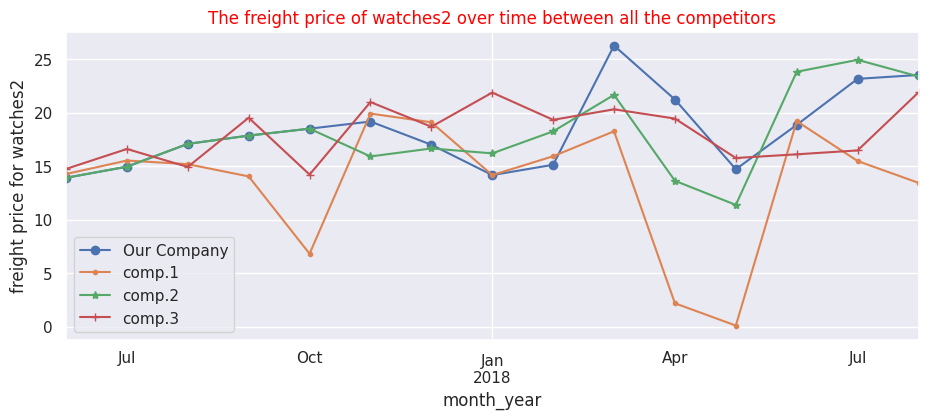

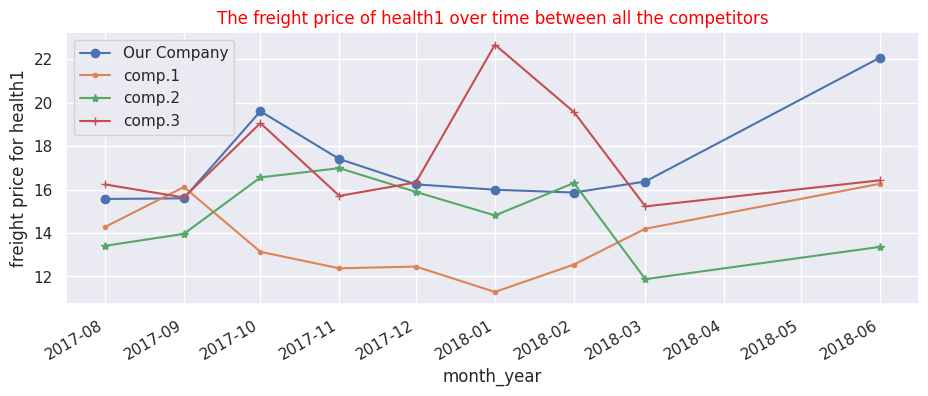

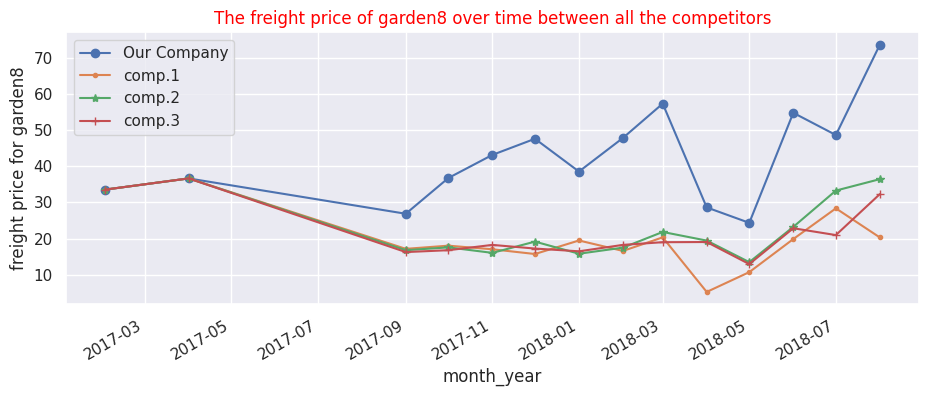

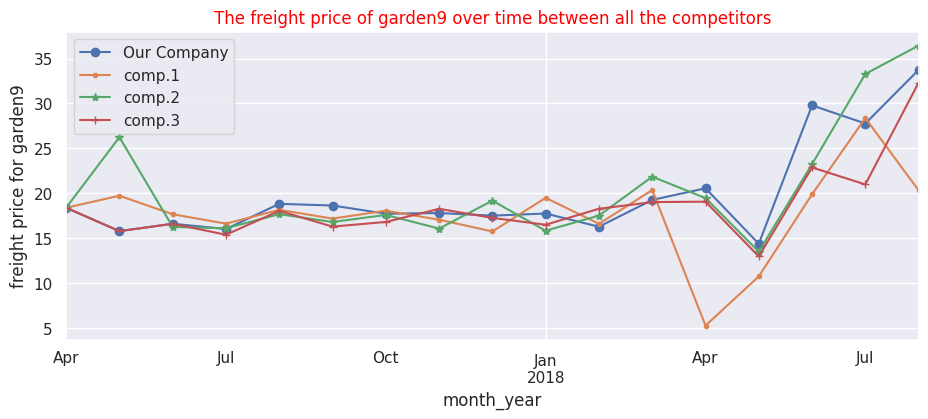

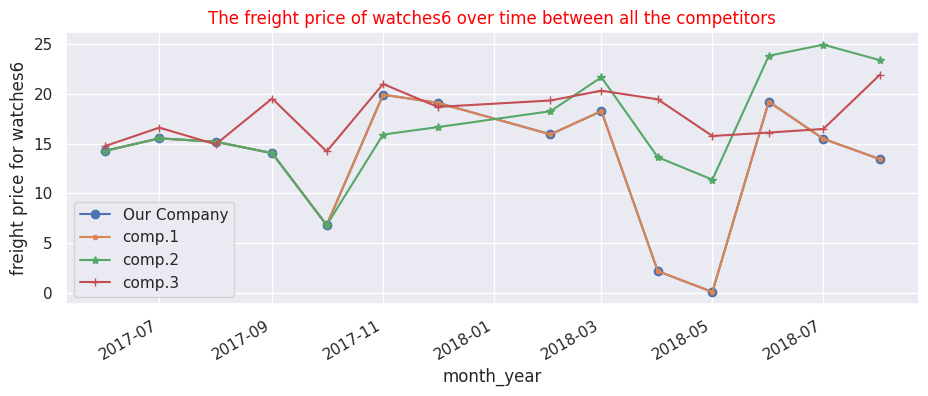

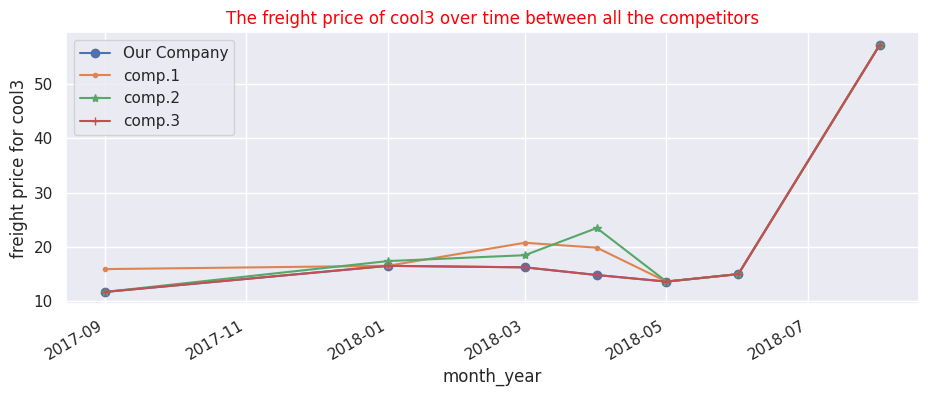

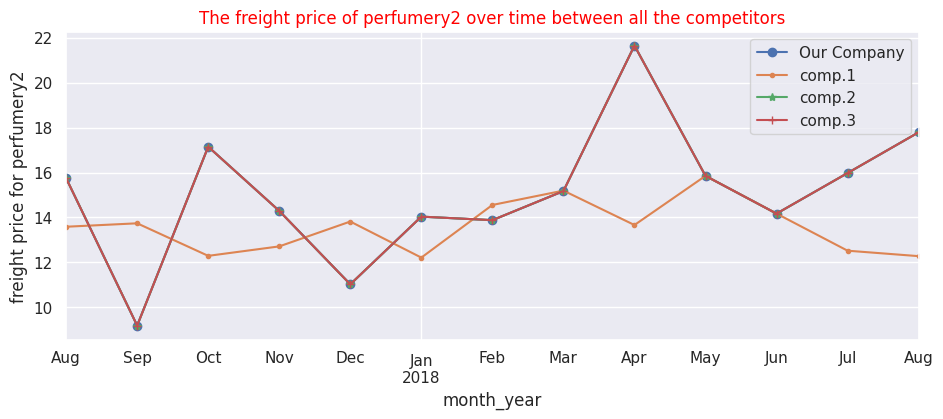

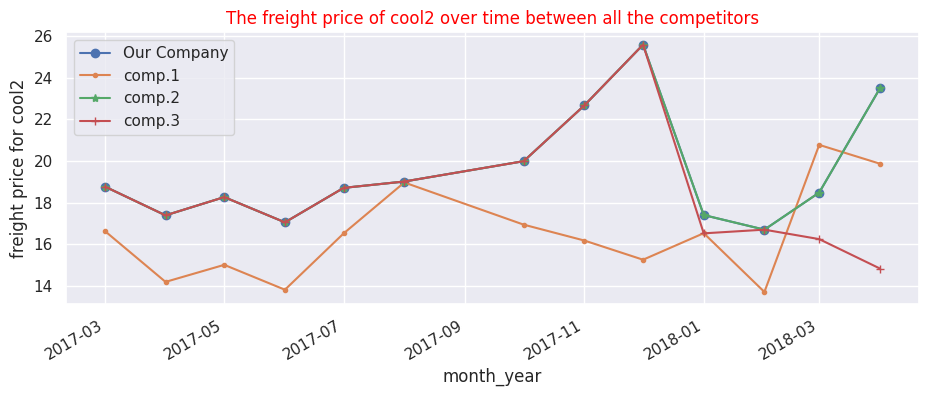

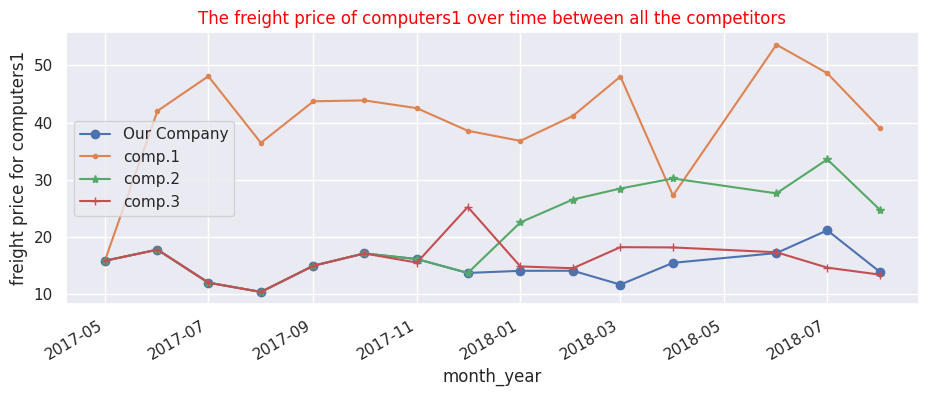

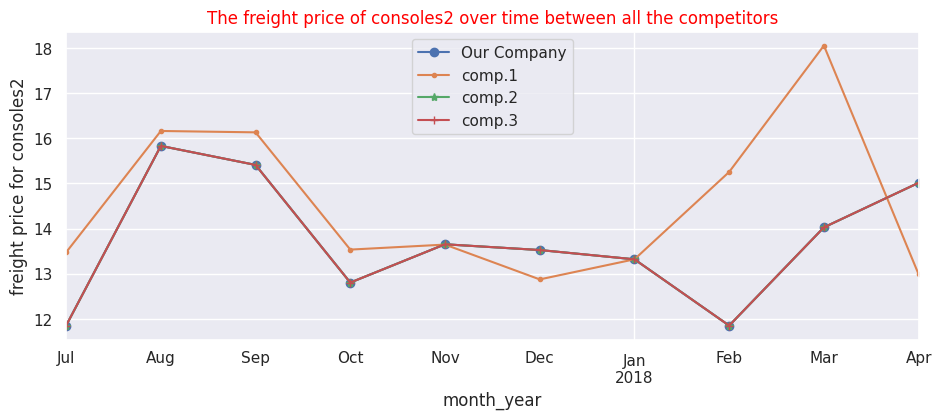

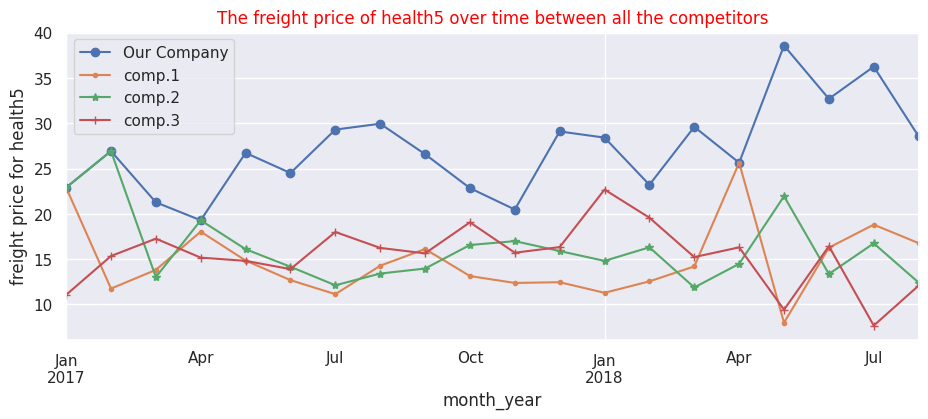

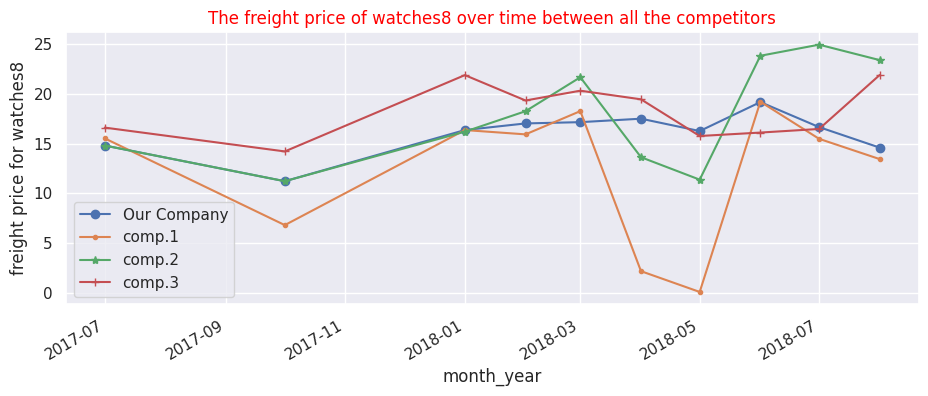

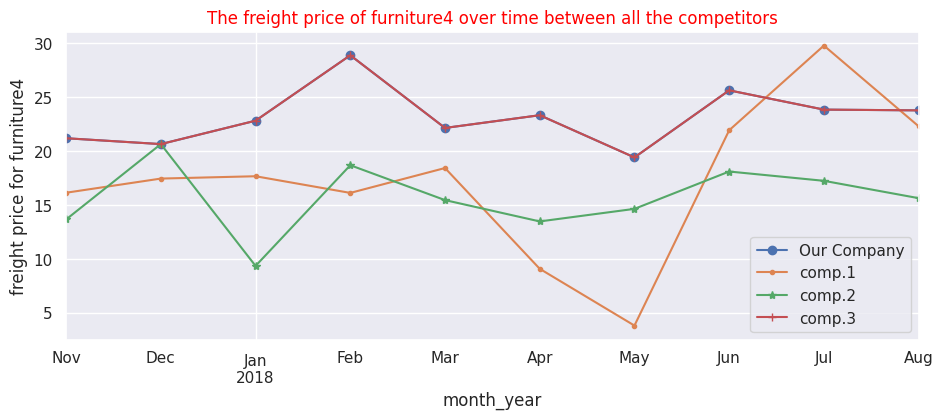

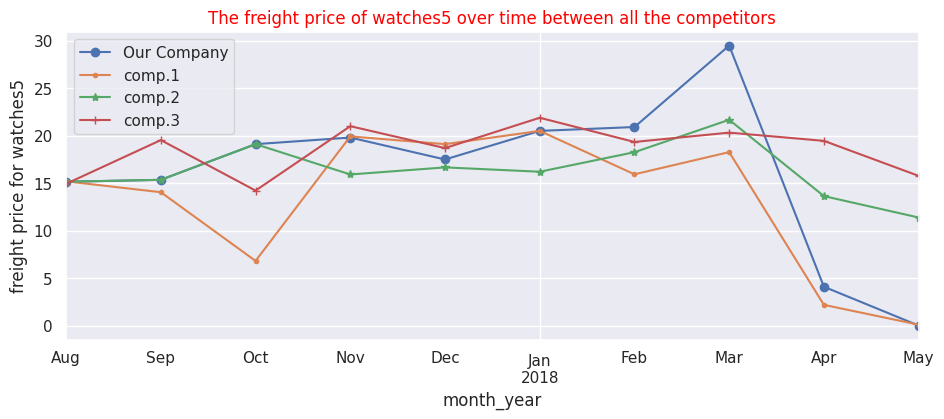

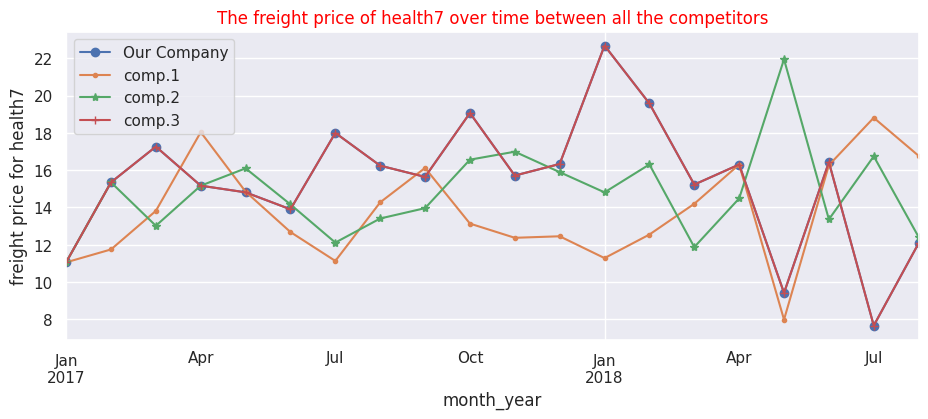

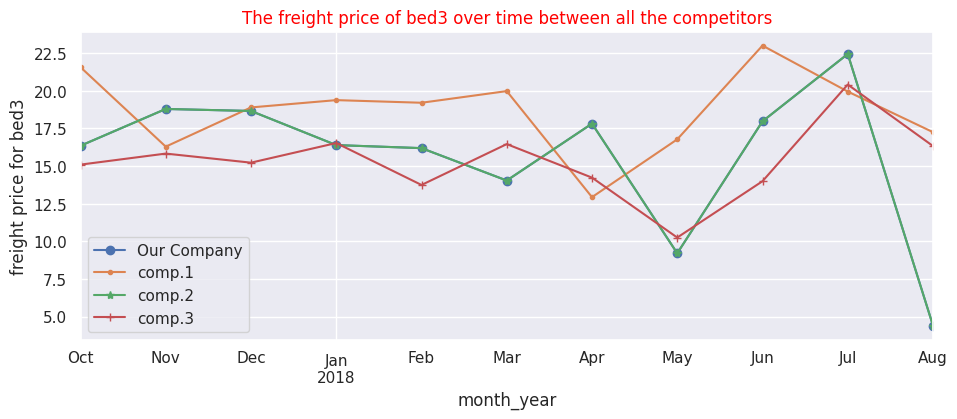

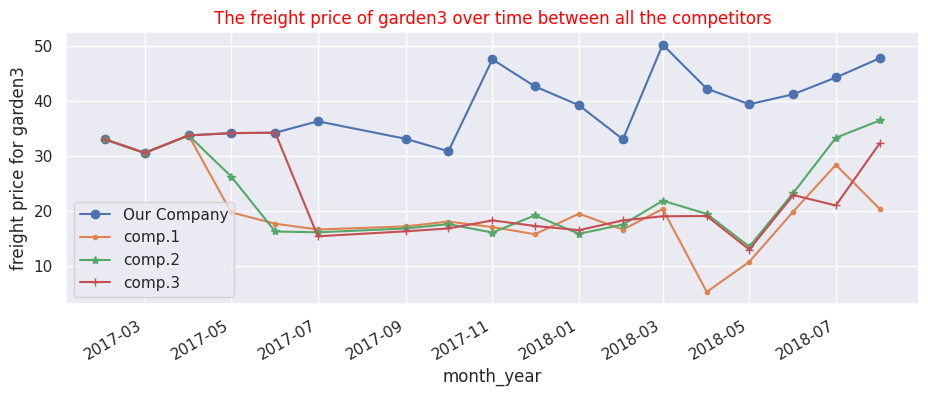

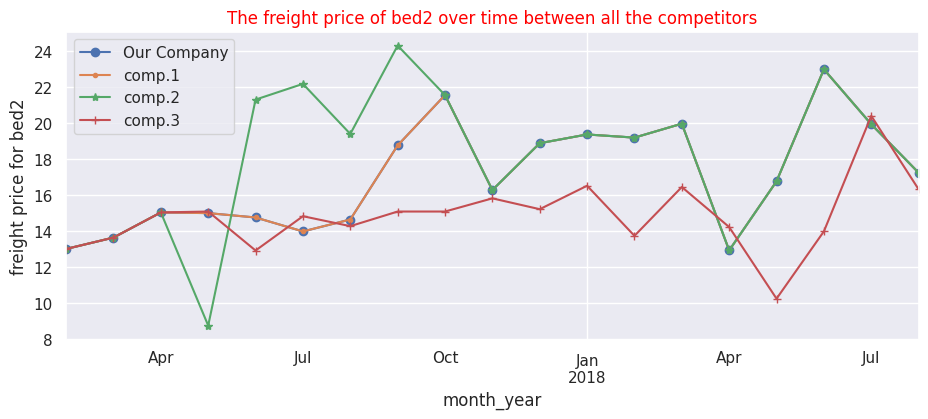

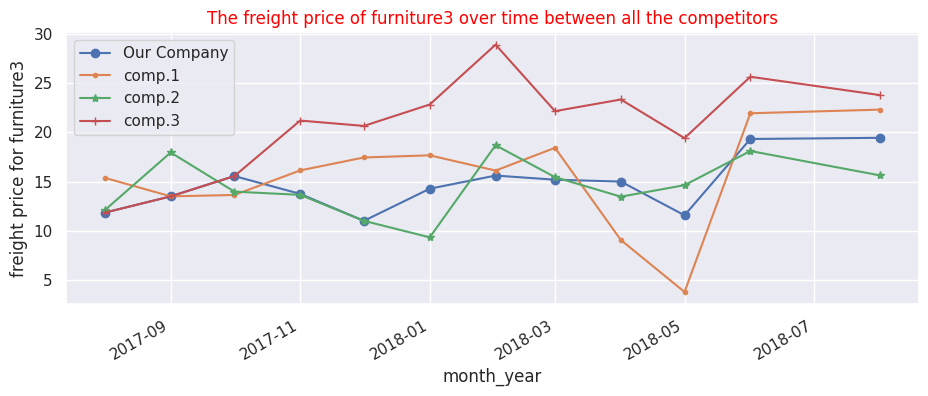

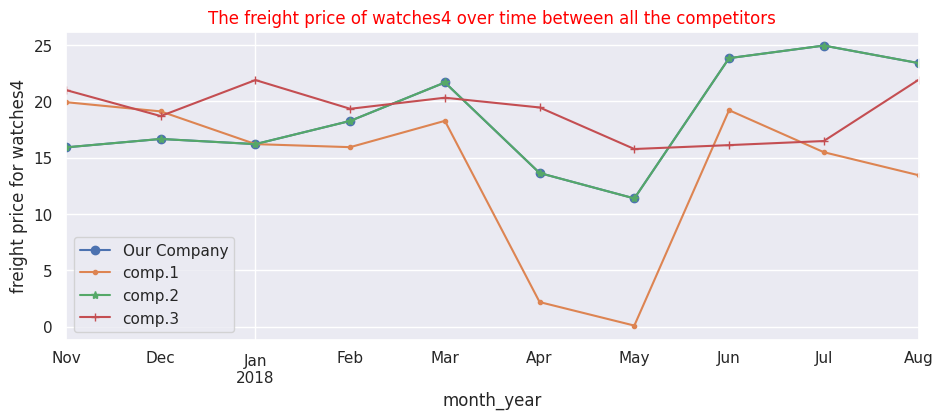

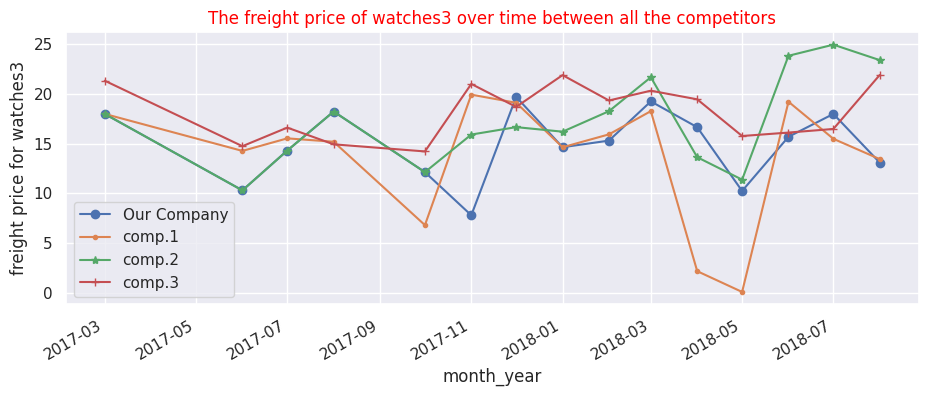

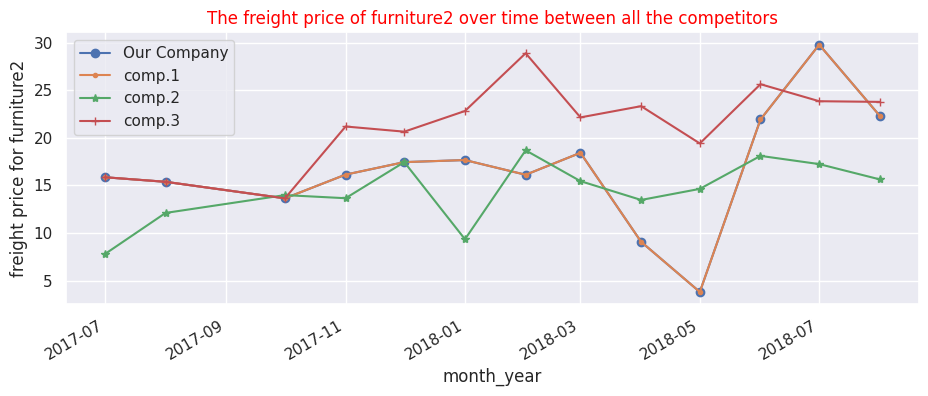

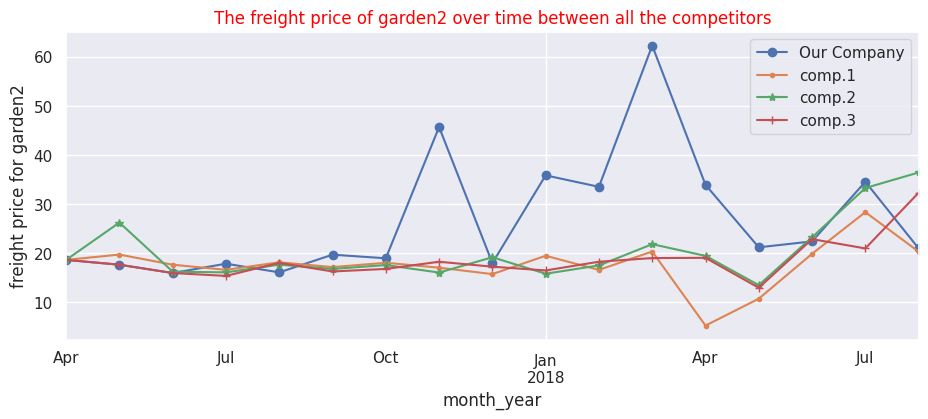

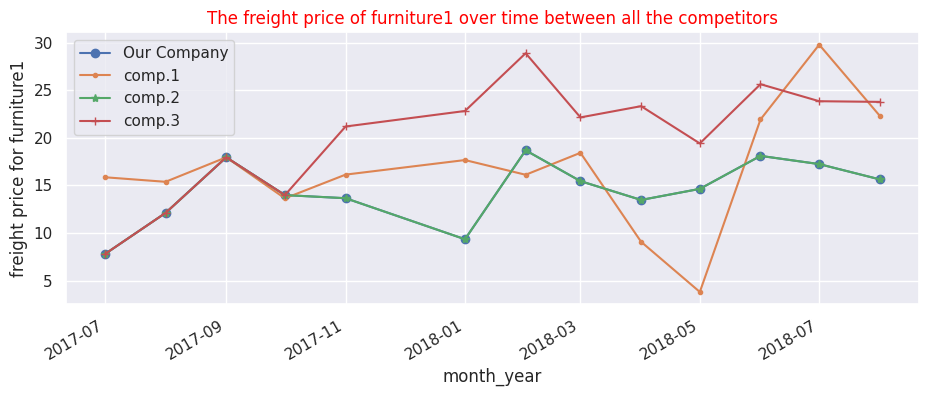

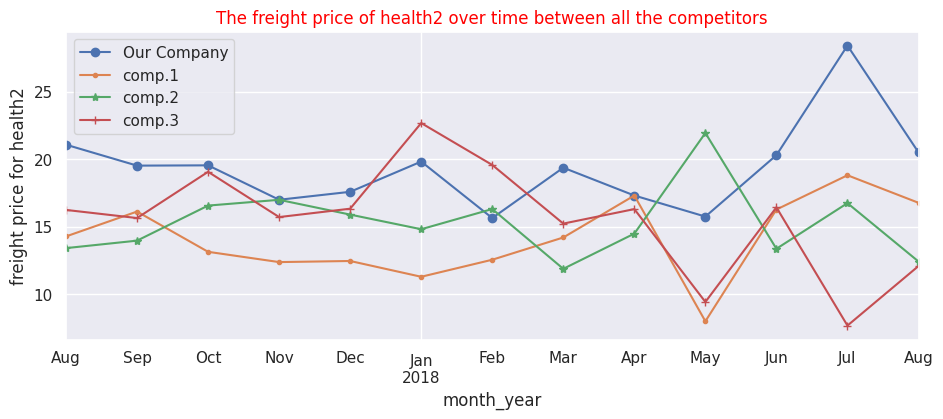

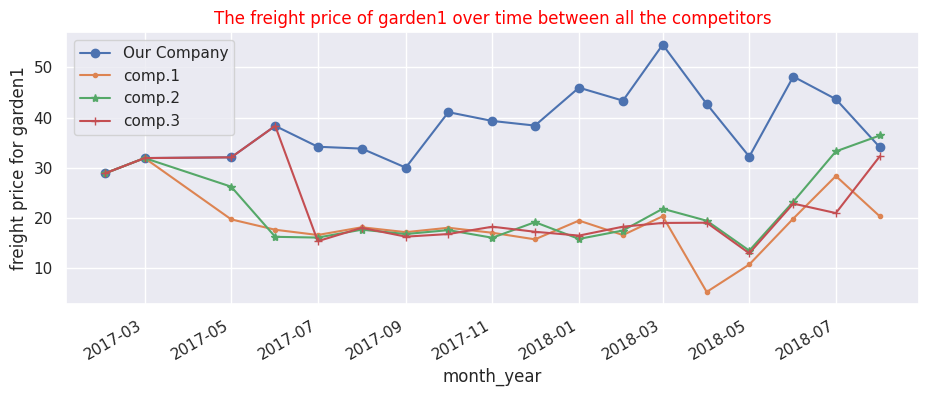

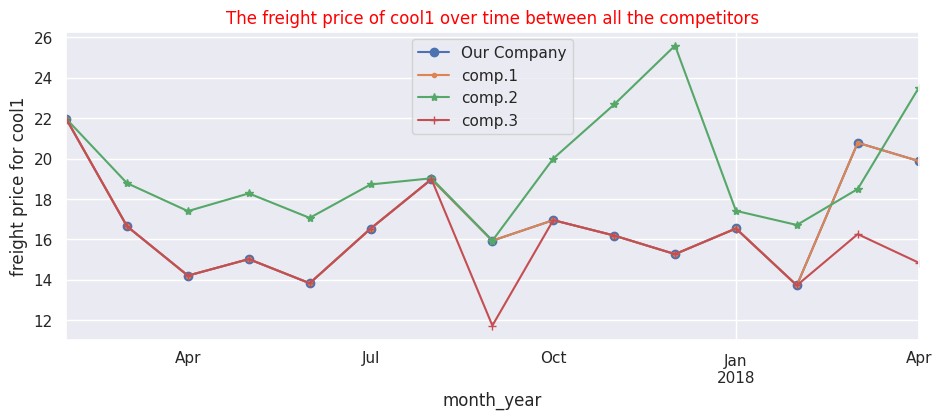

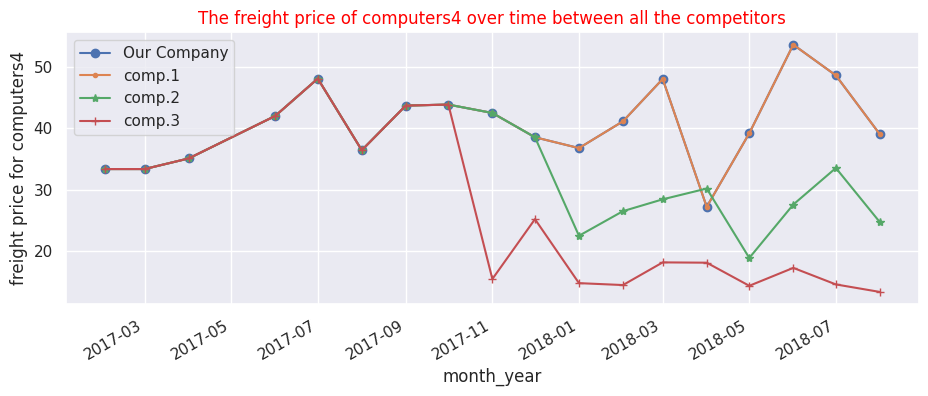

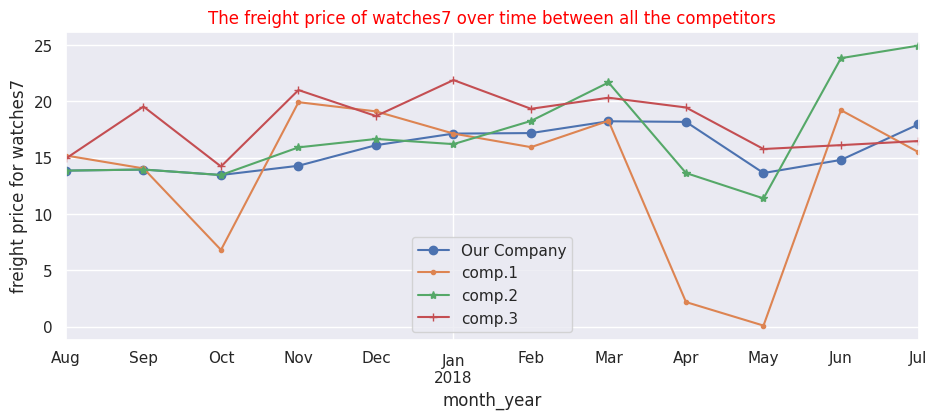

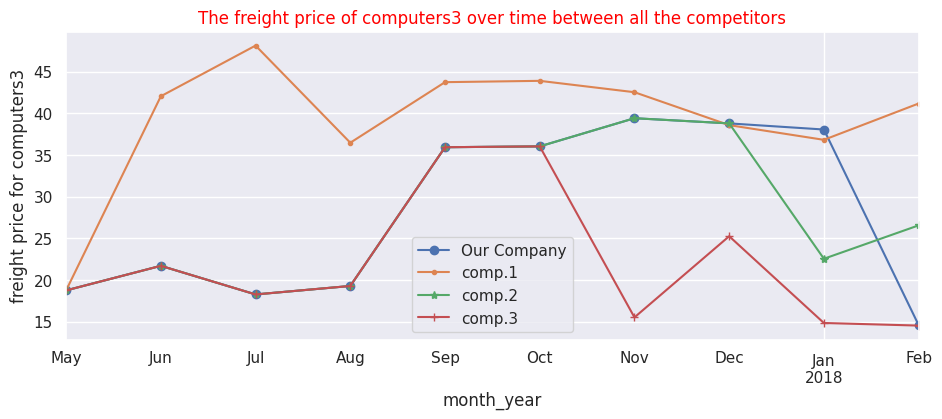

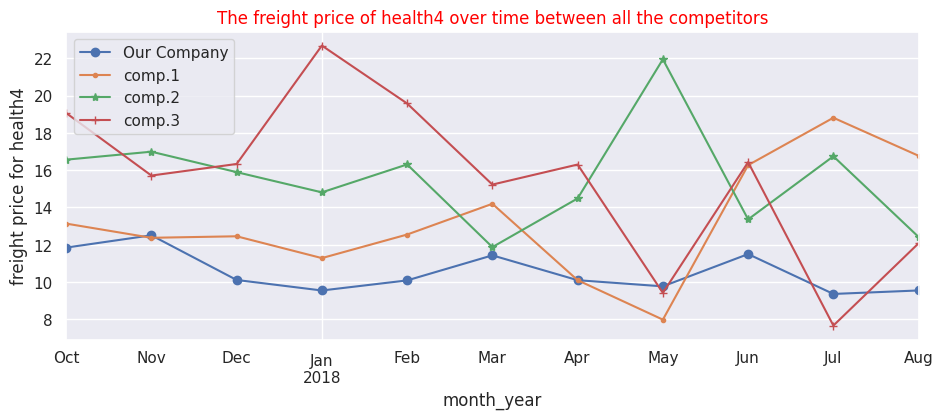

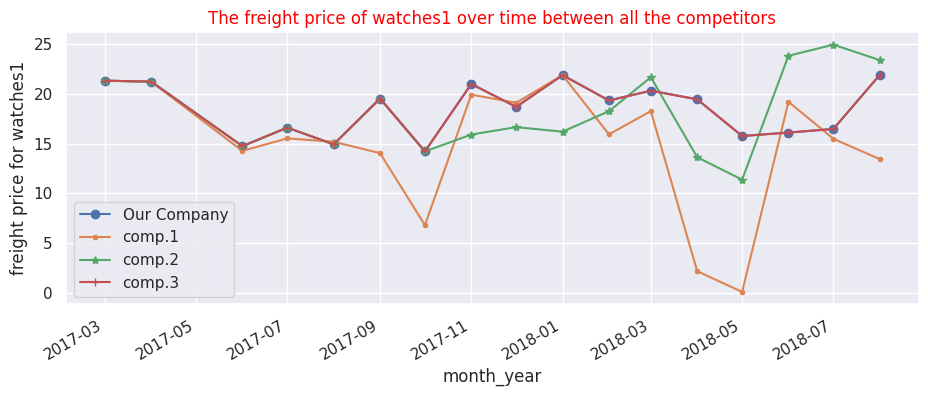

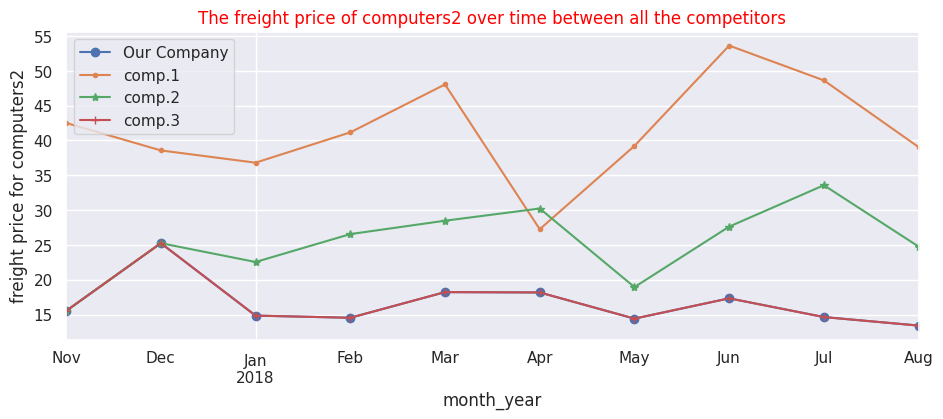

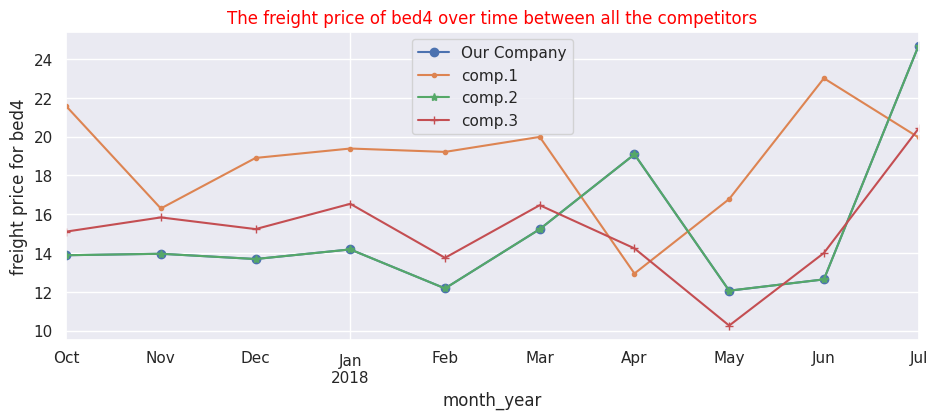

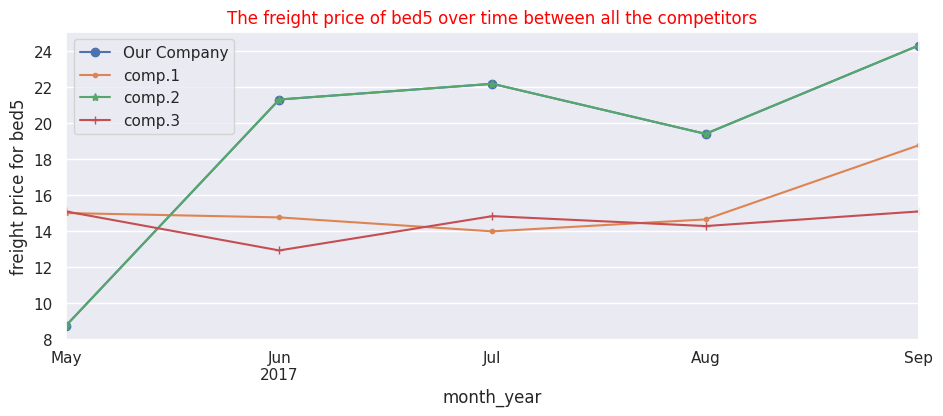

In [ ]:
for i in range(len(products)):
    u=data[data["product_id"]==products[i]]
    plt.figure()
    sns.set(rc={'figure.figsize':(11, 4)})
    ax = u.loc[:, 'freight_price'].plot(marker='o', linestyle='-',label='Our Company')
    ax = u.loc[:, 'Competetor1_FreightPrice'].plot(marker='.', linestyle='-',label='comp.1')
    ax = u.loc[:, 'Competetor2_FreightPrice'].plot(marker='*', linestyle='-',label='comp.2')
    ax = u.loc[:, 'Competetor3_FreightPrice'].plot(marker='+', linestyle='-',label='comp.3')
    ax.set_ylabel('freight price for '+products[i])
    ax.legend()
    plt.title("The freight price of "+products[i]+" over time between all the competitors",color="red")
    plt.show()

**What can we see from this visualization ?**

-Our shipping prices is not that far comparing to the competitors but we need to take care of comeptitor 1 in both the products prices and the shipping prices he is trying to minimize the selling price as much as he can to get more sales .

# **Content Created By** [ApplAi](https://www.linkedin.com/company/applaiasu/)
**Directed by :**
* Director of Machine Learning and Training Department: [Eslam Shouman](https://www.linkedin.com/in/eslam-shouman-0958091b4/)


**Team leader:**

* [Youssef Salem](https://www.linkedin.com/in/youssef-salem3/)


Team Members:
* [Mohamed Hisham](http://linkedin.com/in/engmohamedhisham)
* [Omar Mohamed](https://www.linkedin.com/in/omar-mohamed-saied-b66a40266)
* [Hazem Omran](https://www.linkedin.com/in/hazem-omran-63873b179)
* [Reem Mohamed](https://www.linkedin.com/in/reem-mohamed-66633124a)

